In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

import statsmodels.formula.api as smf
import statsmodels.api as sm

## Introduction
This project explores a recently published dataset, LivWell, from the Science Direct journal and highlighted in a recent edition of Data is Plural. The LivWell is a longitudinal dataset with data on women's well-being in 52 low and middle income countries. The complete data covers 265 indicators.

In this project the question to be explored is: what are the most significant factors related to the female literacy rate, excluding education level? The data was analysed using two different regression models in order to predict the female literacy rate: multilinear regression and decision trees.

Source:
Belmin, C., Hoffmann, R., Elkasabi, M. et al. (2022). LivWell: a sub-national Dataset on the Living Conditions of Women and their Well-being for 52 Countries. *Sci Data* 9, 719 . https://doi.org/10.1038/s41597-022-01824-2

Link to data: https://zenodo.org/record/7277104#.ZAT4xezMK3I

The data comes from 144 Demographic and Health Surveys collected over the past 30 years. According to the study's authors, LivWell includes 'key indicators on women’s socio-economic status, health and well-being, access to basic services and demographic outcomes' and offers 'various opportunities for policy-relevant research on gender inequality, inclusive development and demographic trends.'

In [269]:
data = pd.read_csv('https://zenodo.org/record/7277104/files/livwell.csv?download=1')
data.head()

country_name country_code  year  region_num_harmonized  \
0      Armenia          ARM  2000                      1   
1      Armenia          ARM  2000                      2   
2      Armenia          ARM  2000                      3   
3      Armenia          ARM  2000                      4   
4      Armenia          ARM  2000                      5   

  region_name_harmonized   SurveyId  interview_year_mean  \
0             Aragatsotn  AM2000DHS               2000.0   
1                 Ararat  AM2000DHS               2000.0   
2                Armavir  AM2000DHS               2000.0   
3            Gegharkunik  AM2000DHS               2000.0   
4                   Lori  AM2000DHS               2000.0   

   interview_month_mean  CMC_interview_mean  DM_age_mean  ...  \
0                  11.0             1210.53        30.71  ...   
1                  11.0             1210.55        30.38  ...   
2                  10.0             1210.43        31.10  ...   
3                  11.0             1210.58        30.65  ...   
4                  10.0             1210.43        31.57  ...   

   drought_spei03_n1_share36  drought_spei03_n1_share60  \
0                   0.388889                   0.316667   
1                   0.416667                   0.316667   
2                   0.361111                   0.300000   
3                   0.416667                   0.316667   
4                   0.388889                   0.316667   

   drought_spei03_n1.5_share12  drought_spei03_n1.5_share36  \
0                     0.333333                     0.250000   
1                     0.333333                     0.277778   
2                     0.333333                     0.250000   
3                     0.250000                     0.194444   
4                     0.333333                     0.222222   

   drought_spei03_n1.5_share60  drought_spei03_n2_share12  \
0                     0.166667                   0.083333   
1                     0.233333                   0.083333   
2                     0.166667                   0.083333   
3                     0.166667                   0.083333   
4                     0.150000                   0.083333   

   drought_spei03_n2_share36  drought_spei03_n2_share60       hdi       gdp_pc  
0                   0.083333                       0.05  0.644083  2938.187500  
1                   0.083333                       0.05  0.644127  3053.040283  
2                   0.083333                       0.05  0.644415  3003.245605  
3                   0.083333                       0.05  0.643942  2945.085449  
4                   0.083333                       0.05  0.645256  2925.469727  

[5 rows x 409 columns]

In [270]:
data.shape

(1832, 409)

In [271]:
data.describe()

year  region_num_harmonized  interview_year_mean  \
count  1832.000000            1832.000000          1824.000000   
mean   2005.924672               8.695415          2005.723136   
std       7.181717              10.345797             7.274086   
min    1990.000000               1.000000          1990.000000   
25%    2000.000000               3.000000          2000.000000   
50%    2006.000000               5.000000          2006.000000   
75%    2012.000000              11.000000          2012.000000   
max    2019.000000              93.000000          2019.000000   

       interview_month_mean  CMC_interview_mean  DM_age_mean  DM_age_mean_se  \
count            1824.00000         1824.000000  1824.000000     1832.000000   
mean                7.54057         1276.217736    28.213701        0.425246   
std                 3.26898           87.419613     2.381120        0.401818   
min                 1.00000         1085.410000    17.680000        0.000000   
25%                 5.00000         1204.115000    27.680000        0.240000   
50%                 8.00000         1281.375000    28.600000        0.310000   
75%                10.00000         1347.312500    29.680000        0.410000   
max                13.00000         1436.540000    33.580000        4.620000   

       DM_age_15.19_p  DM_age_15.19_p_se  DM_age_20.24_p  ...  \
count     1824.000000        1832.000000     1824.000000  ...   
mean        18.346595           1.216725       16.854419  ...   
std          7.013974           0.644130        3.704709  ...   
min          0.360000           0.000000        4.800000  ...   
25%         16.520000           0.830000       14.980000  ...   
50%         20.175000           1.190000       17.270000  ...   
75%         22.890000           1.540000       19.212500  ...   
max         33.210000           9.310000       34.330000  ...   

       drought_spei03_n1_share36  drought_spei03_n1_share60  \
count                1699.000000                1699.000000   
mean                    0.190913                   0.188248   
std                     0.132136                   0.113024   
min                     0.000000                   0.000000   
25%                     0.083333                   0.100000   
50%                     0.166667                   0.183333   
75%                     0.277778                   0.266667   
max                     0.722222                   0.633333   

       drought_spei03_n1.5_share12  drought_spei03_n1.5_share36  \
count                  1699.000000                  1699.000000   
mean                      0.078183                     0.074259   
std                       0.117895                     0.077254   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.055556   
75%                       0.083333                     0.111111   
max                       0.833333                     0.444444   

       drought_spei03_n1.5_share60  drought_spei03_n2_share12  \
count                  1699.000000                1699.000000   
mean                      0.071326                   0.019914   
std                       0.063944                   0.060229   
min                       0.000000                   0.000000   
25%                       0.016667                   0.000000   
50%                       0.066667                   0.000000   
75%                       0.100000                   0.000000   
max                       0.416667                   0.833333   

       drought_spei03_n2_share36  drought_spei03_n2_share60          hdi  \
count                1699.000000                1699.000000  1578.000000   
mean                    0.018835                   0.017785     0.532819   
std                     0.034432                   0.027606     0.123282   
min                     0.000000                  

In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832 entries, 0 to 1831
Columns: 409 entries, country_name to gdp_pc
dtypes: float64(403), int64(2), object(4)
memory usage: 5.7+ MB


In [273]:
data.columns

Index(['country_name', 'country_code', 'year', 'region_num_harmonized',
       'region_name_harmonized', 'SurveyId', 'interview_year_mean',
       'interview_month_mean', 'CMC_interview_mean', 'DM_age_mean',
       ...
       'drought_spei03_n1_share36', 'drought_spei03_n1_share60',
       'drought_spei03_n1.5_share12', 'drought_spei03_n1.5_share36',
       'drought_spei03_n1.5_share60', 'drought_spei03_n2_share12',
       'drought_spei03_n2_share36', 'drought_spei03_n2_share60', 'hdi',
       'gdp_pc'],
      dtype='object', length=409)

## Data
The complete dataset has 1832 rows with 409 features. Most of the data, except for country and interview information, is numerical. Looking at data.describe() there are null values to clean, and not all the features are suitable for the modeling.

The response variable for this project is called 'ED_litt_p' and it will be renamed 'female_lit_rate' for greater clarity.

In [274]:
# Renaming ED_litt_p as female_lit_rate. This is the response variable, female literacy rate, 
# that we are trying to predict in the modelling.
data.columns = data.columns.str.replace('ED_litt_p', 'female_lit_rate')

## Data preparation

In this analysis of non-educational factors for female literacy rates, the columns related to climate conditions were removed, including the precipitation, tempature, evaporation and drought indicator categories. In addition, the education indicator category was removed, to isolate literacy rates from number of years of schooling.

Although the earliest data is from 1991, there is more consistent data collection from 2000, so the dataset was filtered by year from 2000.

Finally, the columns related to data collection, like month of the interview, and dupliate information for country was removed.

In [275]:
# Removing the features
col_lst = data.columns

prefix = ['ED_', 'pre_', 'tmp_', 'spei03_', 'drought']
for p in prefix:
    data = data.drop(list(filter(lambda x: x.startswith(p), col_lst)), axis =1)
data.columns

Index(['country_name', 'country_code', 'year', 'region_num_harmonized',
       'region_name_harmonized', 'SurveyId', 'interview_year_mean',
       'interview_month_mean', 'CMC_interview_mean', 'DM_age_mean',
       ...
       'HL_IMR', 'HL_CMR', 'HL_U5MR', 'HL_NNMR_SE', 'HL_PNNMR_SE', 'HL_IMR_SE',
       'HL_CMR_SE', 'HL_U5MR_SE', 'hdi', 'gdp_pc'],
      dtype='object', length=264)

In [276]:
data['year'].value_counts()

2010    121
2012    116
2000    112
2003    110
2005     88
2007     82
2006     81
2011     79
2004     79
2013     75
2008     73
2017     70
1996     68
2016     66
1997     63
1999     61
2015     59
2014     58
1998     58
2009     56
1994     52
1993     45
2018     40
2001     36
1992     32
1995     20
2002     15
2019      8
1990      5
1991      4
Name: year, dtype: int64

In [277]:
data = data[data['year'] >= 2000]


In [278]:
# Remove the features strictly related to data collection.
data= data.drop(['country_code', 'region_num_harmonized', 'region_name_harmonized', 'SurveyId', 'interview_year_mean',
       'interview_month_mean', 'CMC_interview_mean', 'female_lit_rate_se'], axis = 1)
data.head()

country_name  year  DM_age_mean  DM_age_mean_se  DM_age_15.19_p  \
0      Armenia  2000        30.71            0.35           19.01   
1      Armenia  2000        30.38            0.32           17.55   
2      Armenia  2000        31.10            0.33           16.97   
3      Armenia  2000        30.65            0.34           19.43   
4      Armenia  2000        31.57            0.46           16.14   

   DM_age_15.19_p_se  DM_age_20.24_p  DM_age_20.24_p_se  DM_age_25.29_p  \
0               1.58           13.84               1.91           11.98   
1               0.94           17.55               1.42           14.36   
2               1.02           16.77               1.49           12.53   
3               2.03           15.54               1.42           12.68   
4               1.66           15.65               1.86           11.49   

   DM_age_25.29_p_se  ...  HL_IMR  HL_CMR  HL_U5MR  HL_NNMR_SE  HL_PNNMR_SE  \
0               1.53  ...   58.82    7.99    66.35       15.64         7.69   
1               1.33  ...   32.07    0.00    32.07        7.62        16.56   
2               1.91  ...   32.77    2.92    35.59       19.61         6.40   
3               2.08  ...   75.33    5.49    80.41       19.42        11.87   
4               1.62  ...   59.64    0.00    59.64       11.37        20.58   

   HL_IMR_SE  HL_CMR_SE  HL_U5MR_SE       hdi       gdp_pc  
0      14.48       5.71       17.02  0.644083  2938.187500  
1      19.32       0.00       19.32  0.644127  3053.040283  
2      21.40       2.95       21.04  0.644415  3003.245605  
3      22.63       5.56       25.09  0.643942  2945.085449  
4      20.12       0.00       20.12  0.645256  2925.469727  

[5 rows x 256 columns]

## Data cleaning



(array([ 51.,  76.,  71.,  51.,  93., 122., 164., 157., 176., 455.]),
 array([  3.64 ,  13.276,  22.912,  32.548,  42.184,  51.82 ,  61.456,
         71.092,  80.728,  90.364, 100.   ]),
 <BarContainer object of 10 artists>)

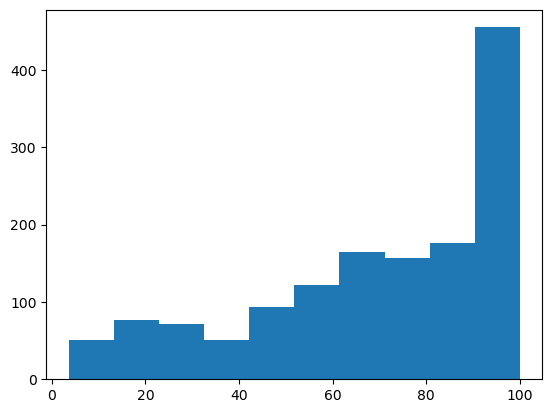

In [279]:
# The rate of female literacy is the response variable, from the historgram we can see that it is not a normal distribution
# and the greatest concentration of values is between 90% and 100%.

plt.hist(data['female_lit_rate'])

In [280]:
data_lit = data[['country_name', 'female_lit_rate']]
data_lit.groupby(['country_name']).mean().sort_values('female_lit_rate', ascending = False)


female_lit_rate
country_name                              
Armenia                         100.000000
Colombia                        100.000000
Tajikistan                       97.930000
Philippines                      97.732794
South Africa                     97.335000
Lesotho                          95.313333
Gabon                            92.889000
Zimbabwe                         92.592667
Maldives                         91.785833
Peru                             91.506667
Bolivia                          90.906875
Vietnam                          89.242857
Honduras                         88.443125
Namibia                          87.650000
Rwanda                           86.493333
Turkey                           85.083333
Guatemala                        82.858750
Nicaragua                        81.330588
Indonesia                        79.131188
Cameroon                         75.506818
Kenya                            74.676250
Tanzania                         72.651739
Madagascar                       69.330833
Burundi                          69.127500
Timor-Leste                      68.854231
Jordan                           68.351667
Cambodia                         67.755139
Malawi                           67.747500
Bangladesh                       67.137667
Haiti                            64.633889
India                            64.284231
Zambia                           63.463437
Congo Democratic Republic        60.625000
Uganda                           59.186250
Nigeria                          56.863333
Morocco                          49.678333
Togo                             47.733333
Ghana                            44.294000
Egypt                            42.845000
Mozambique                       42.277273
Nepal                            41.610000
Senegal                          41.014722
Ethiopia                         37.378182
Sierra Leone                     36.355833
Liberia                          36.041000
Cote d'Ivoire                    31.281000
Benin                            28.537917
Pakistan                         22.270769
Mali                             19.500690
Guinea                           19.173750
Burkina Faso                     16.385385
Niger                            16.199167

In [281]:
# The female literacy rate of 100% in Colombia and Armenia is unlikely, and is not supported by the literacy rate 
# for reading a sentence, so those rows will be removed. 

data = data[data['country_name'] != 'Armenia']
data = data[data['country_name'] != 'Colombia']

In [282]:
# The threshold for imputing or throw columns is 0 to 5% of rows with missing data to impute. Greater than 5% of rows 
# with missing data, and the feature will be removed.

print('\n', '5% of the rows is', round((data.shape[0])* 0.05, 1), '\n')

col_to_impute = data.columns[(data.isnull().sum()/len(data)>0) & (data.isnull().sum()/len(data)<=0.05)].tolist()
col_to_throw = data.columns[data.isnull().sum()/len(data)>0.05].tolist()

print('There are', len(col_to_impute), 'columns to impute:', '\n', col_to_impute, '\n')
print('There are', len(col_to_throw), 'columns to throw:', '\n', col_to_throw)


 5% of the rows is 67.9 

There are 109 columns to impute: 
 ['DM_age_mean', 'DM_age_15.19_p', 'DM_age_20.24_p', 'DM_age_25.29_p', 'DM_age_30.34_p', 'DM_age_35.39_p', 'DM_age_40.44_p', 'DM_age_45.49_p', 'DM_urban_p', 'DM_marr_p', 'DM_age_marr_mean', 'DM_age_marr_mean_se', 'DM_age_diff_mean', 'DM_age_diff_mean_se', 'DM_age_diff_10plus_p', 'DM_age_diff_10plus_p_se', 'DM_age_diff_5_9_p', 'DM_age_diff_5_9_p_se', 'DM_age_diff_5minus_p', 'DM_age_diff_5minus_p_se', 'DM_age_diff_0_p', 'DM_age_diff_0_p_se', 'HH_women_toilet_high_p', 'HH_women_toilet_high_p_se', 'HH_women_toilet_low_p', 'HH_women_toilet_low_p_se', 'HH_women_water_high_p_se', 'HH_women_water_low_p_se', 'HD_women_size_mean', 'HD_women_children_mean', 'WK_working_p', 'WK_working_p_se', 'WK_working12_p', 'WK_working12_p_se', 'WK_working_paid_p', 'WK_working_paid_p_se', 'WK_working_agri_p_se', 'female_lit_rate', 'EI_women_elec_p', 'EI_women_elec_p_se', 'EI_women_radio_p', 'EI_women_radio_p_se', 'EI_women_tv_p', 'EI_women_fridge_p', 

In [283]:
# Remove the features with more than 5% missing data.
data = data.drop(col_to_throw, axis = 1)
data.head()

country_name  year  DM_age_mean  DM_age_mean_se  DM_age_15.19_p  \
44      Burundi  2010        26.09            0.24           28.21   
45      Burundi  2010        27.95            0.22           24.32   
46      Burundi  2010        27.61            0.18           23.78   
47      Burundi  2010        27.94            0.19           26.03   
48      Burundi  2016        26.88            0.22           24.17   

    DM_age_15.19_p_se  DM_age_20.24_p  DM_age_20.24_p_se  DM_age_25.29_p  \
44               1.19           23.42               1.34           17.59   
45               1.14           19.47               1.01           17.38   
46               0.91           20.96               0.96           17.76   
47               0.73           17.87               0.70           16.43   
48               1.21           22.11               1.59           18.76   

    DM_age_25.29_p_se  ...  HL_NNMR  HL_PNNMR  HL_IMR  HL_CMR  HL_U5MR  \
44               1.30  ...    19.02     22.00   41.02   14.51    54.93   
45               1.01  ...    38.17     37.26   75.43   53.25   124.66   
46               0.85  ...    22.29     25.34   47.63   39.66    85.40   
47               0.78  ...    31.52     23.77   55.28   33.08    86.54   
48               1.58  ...    39.69     31.21   70.91    6.61    77.05   

    HL_NNMR_SE  HL_PNNMR_SE  HL_IMR_SE  HL_CMR_SE  HL_U5MR_SE  
44        5.33         6.02       8.36       5.92        9.38  
45        6.03         5.63       8.32       4.79        9.24  
46        3.26         3.78       4.82       4.92        7.13  
47        3.50         2.63       4.64       4.11        6.29  
48       19.88         9.44      26.78       3.68       25.89  

[5 rows x 162 columns]

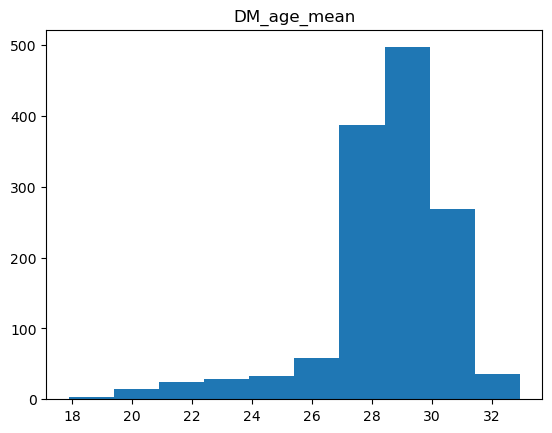

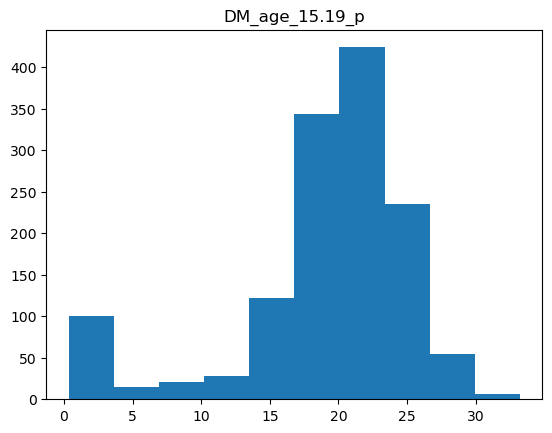

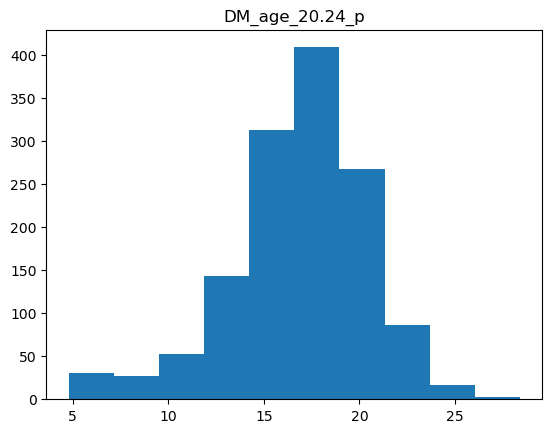

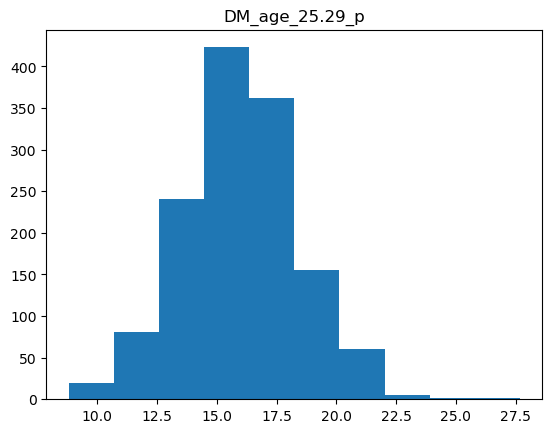

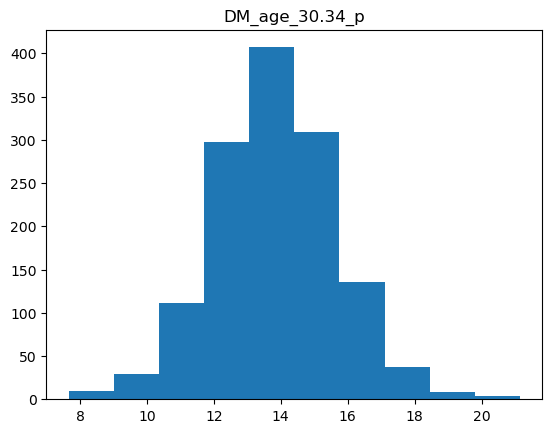

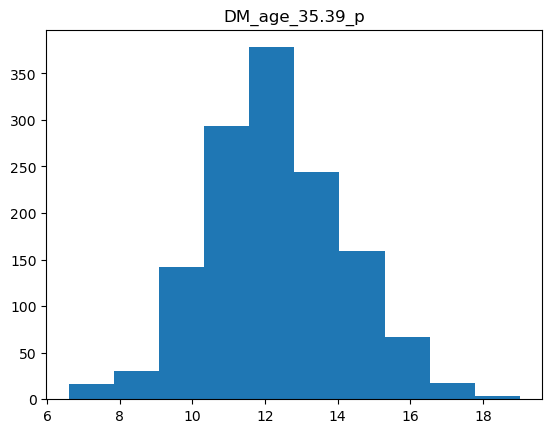

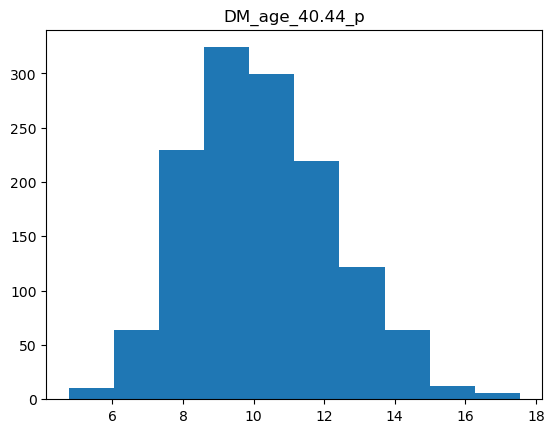

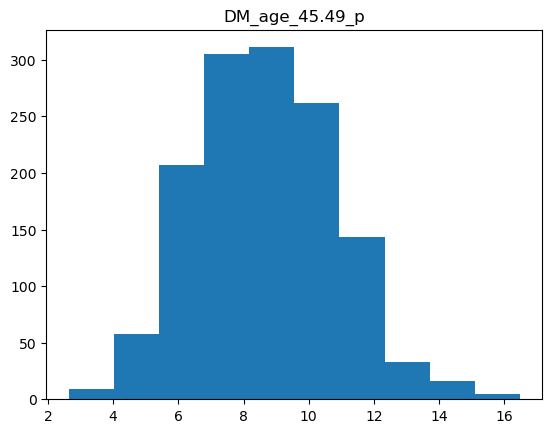

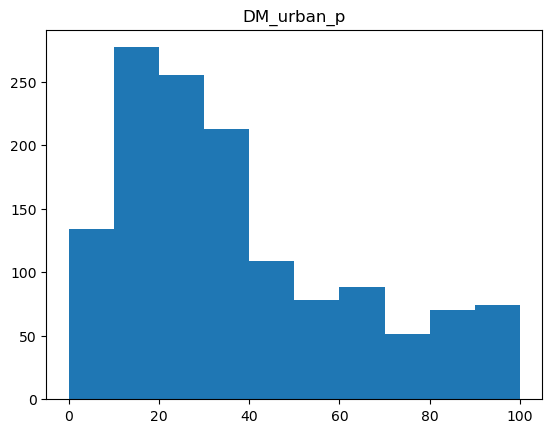

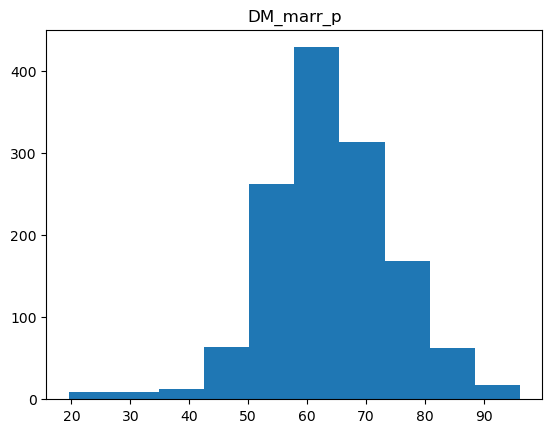

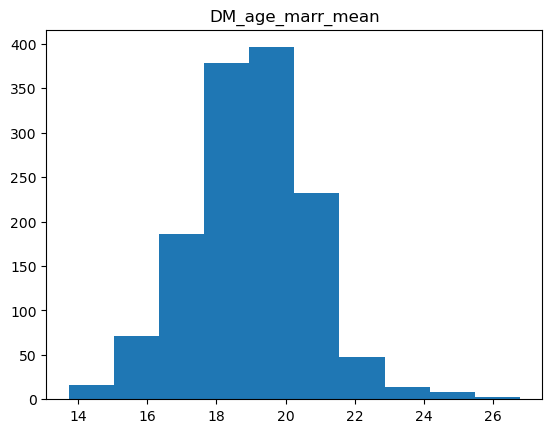

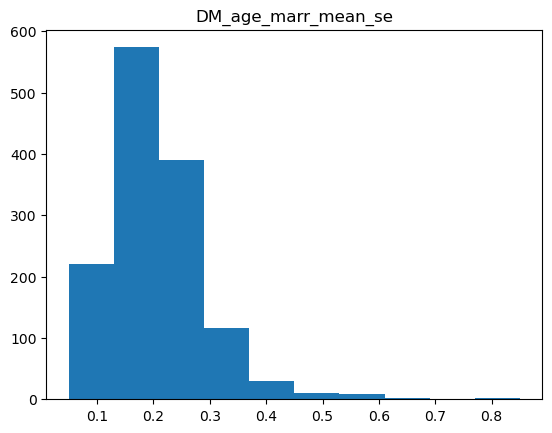

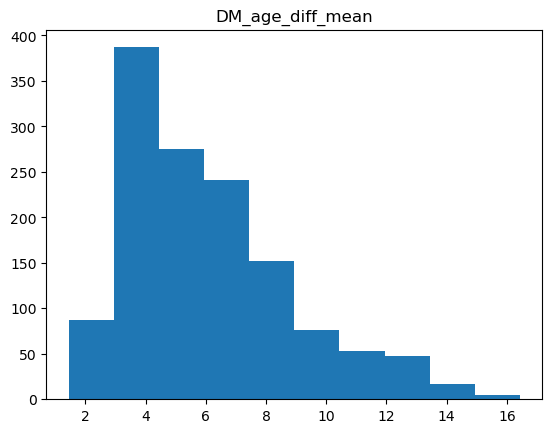

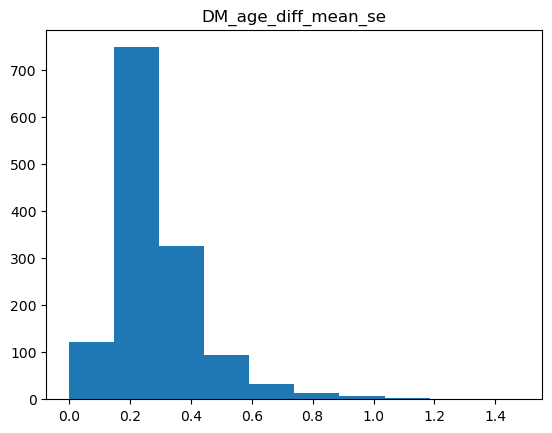

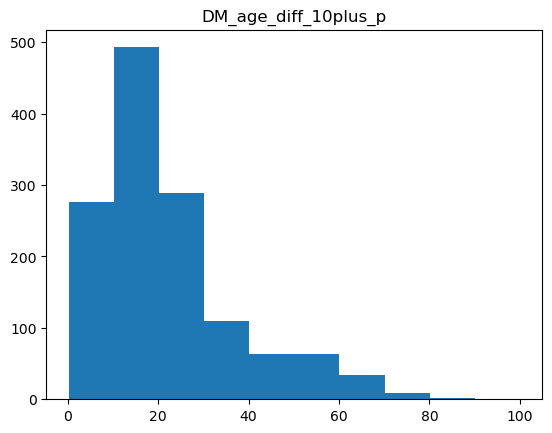

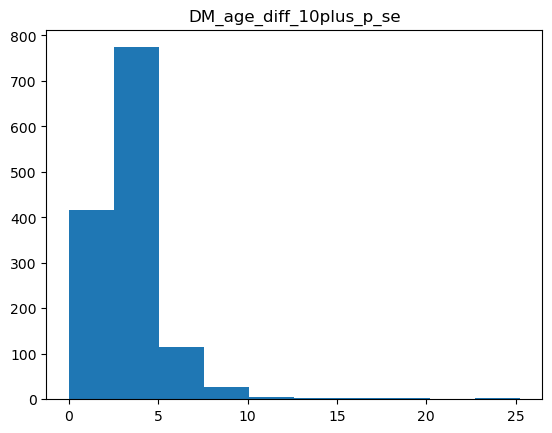

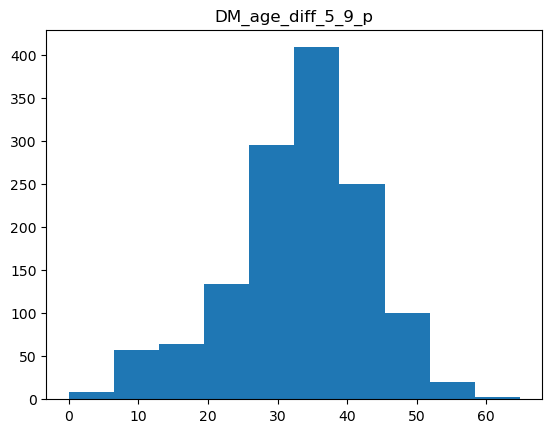

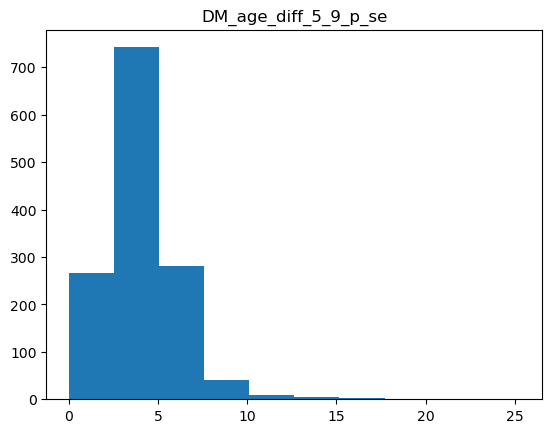

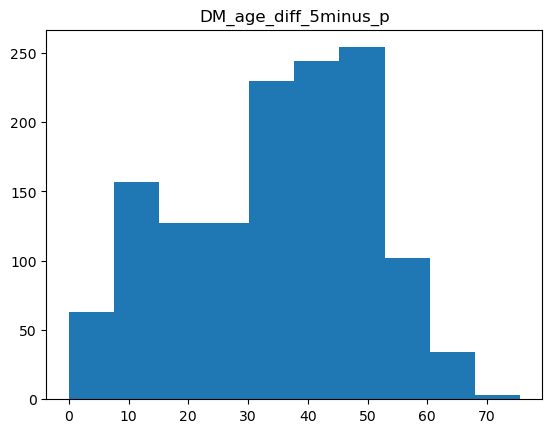

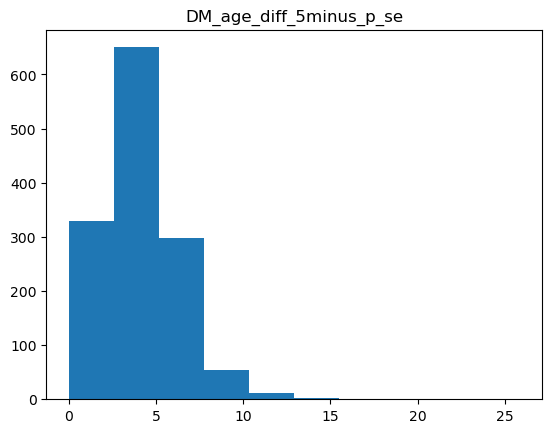

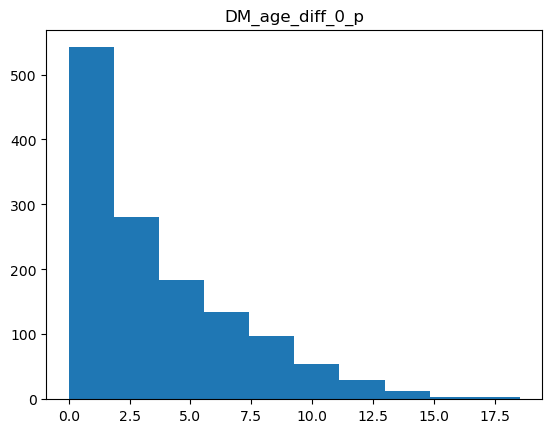

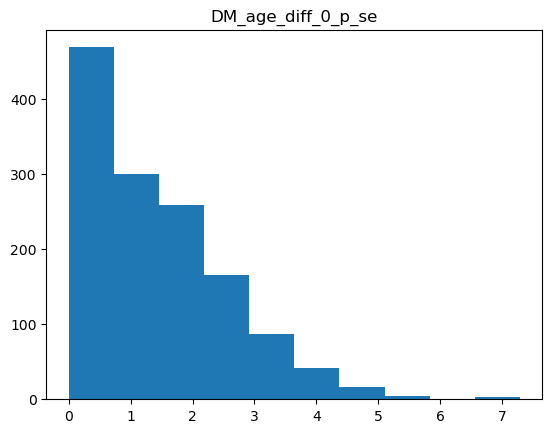

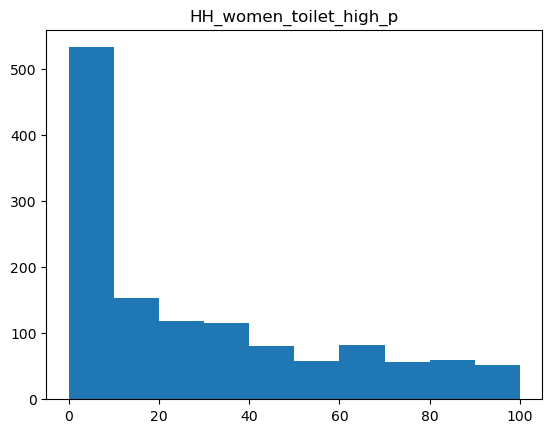

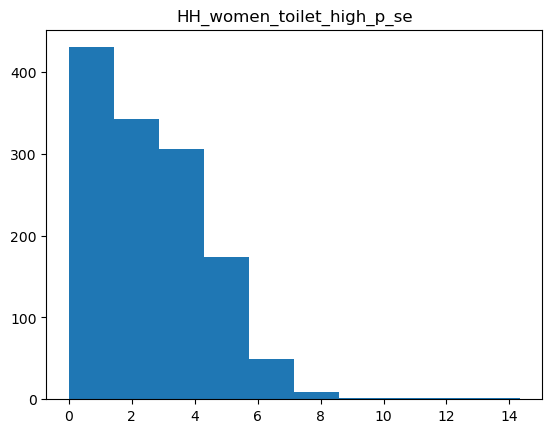

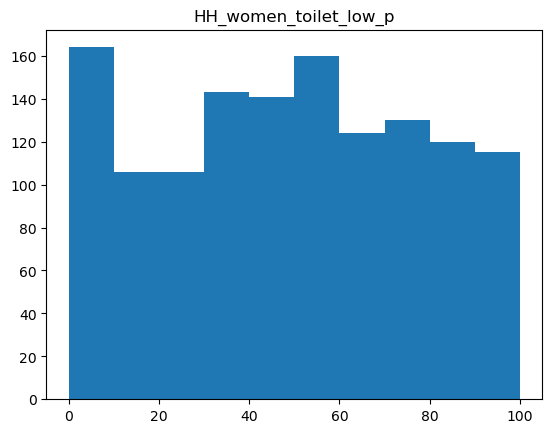

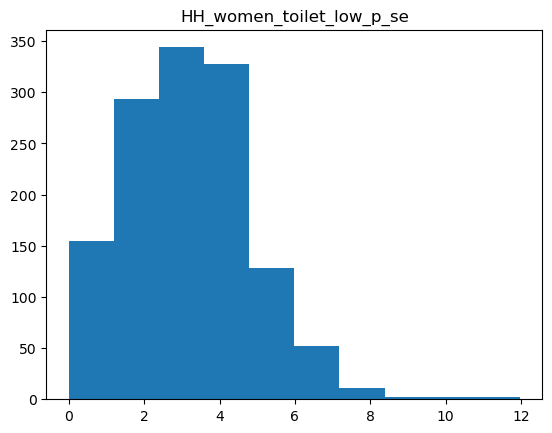

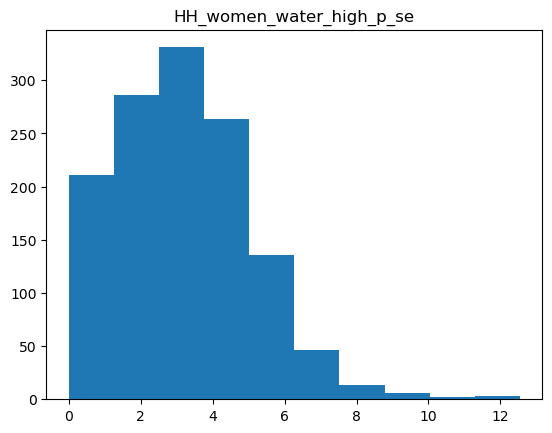

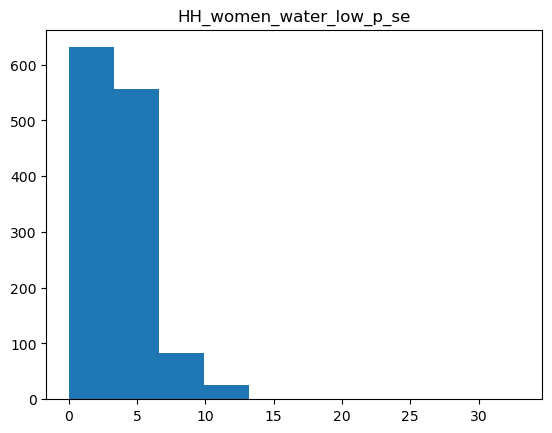

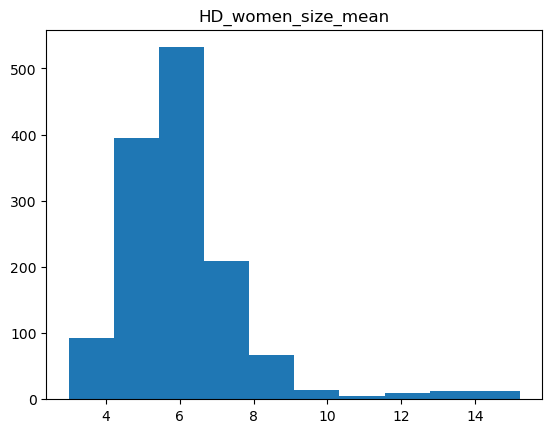

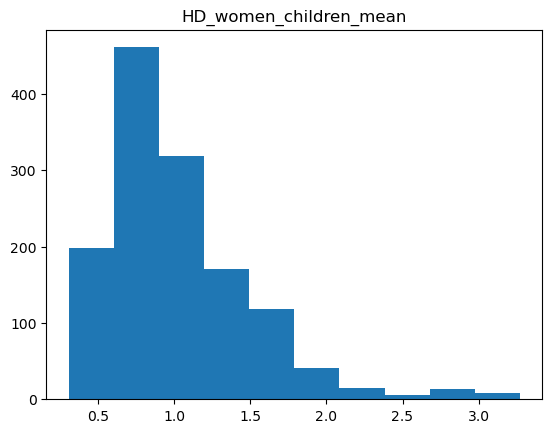

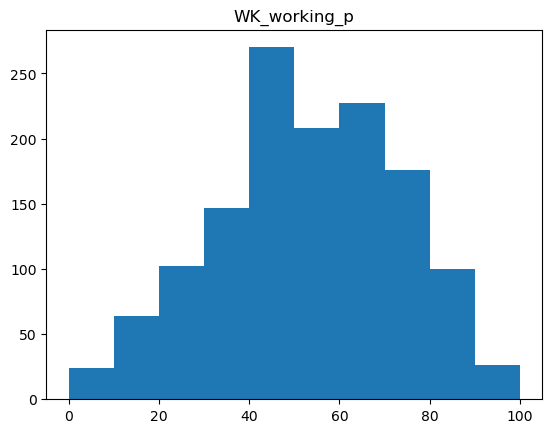

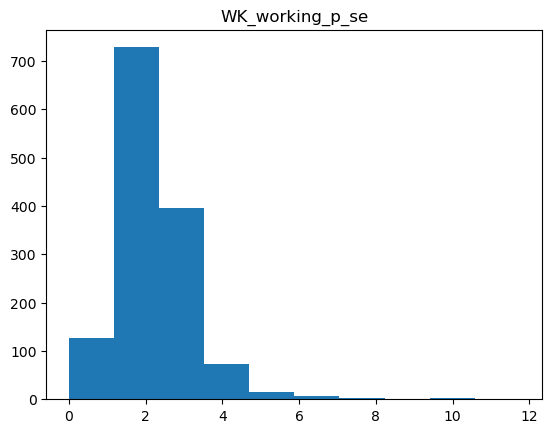

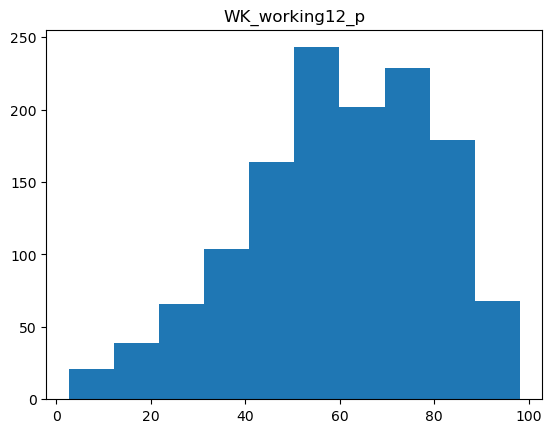

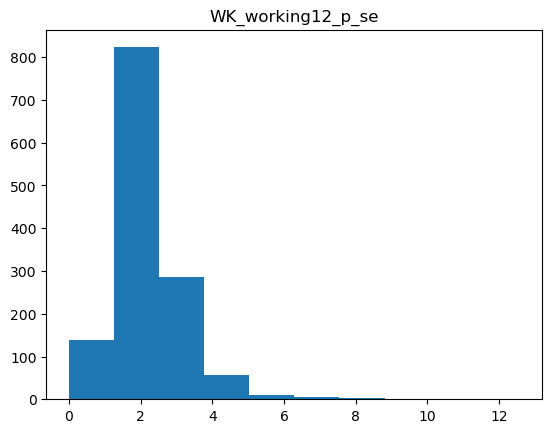

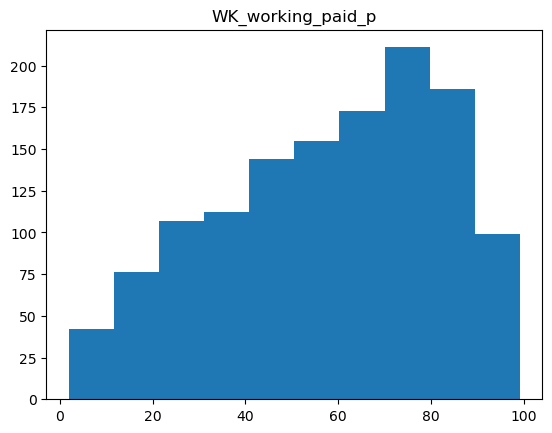

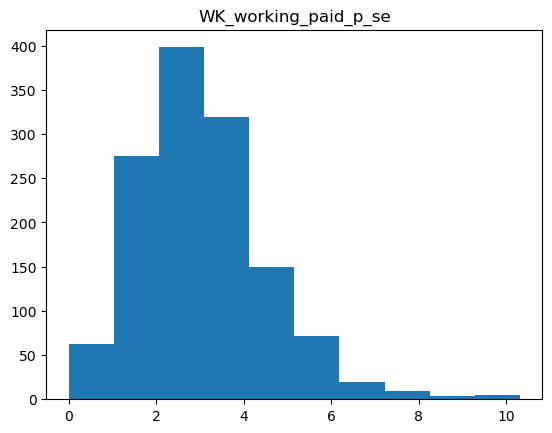

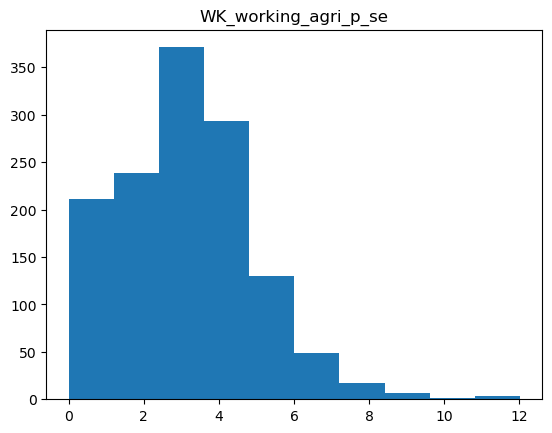

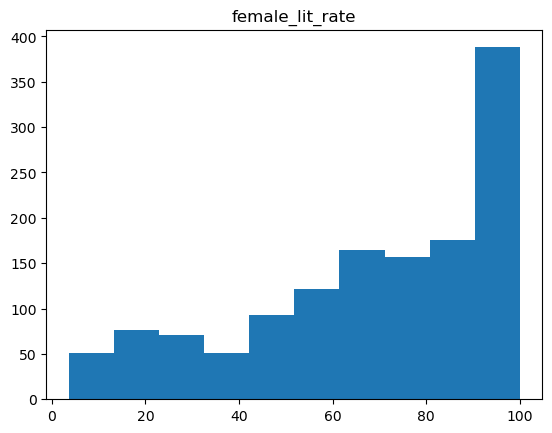

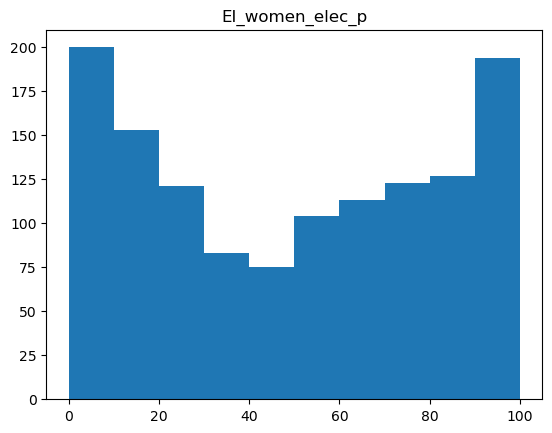

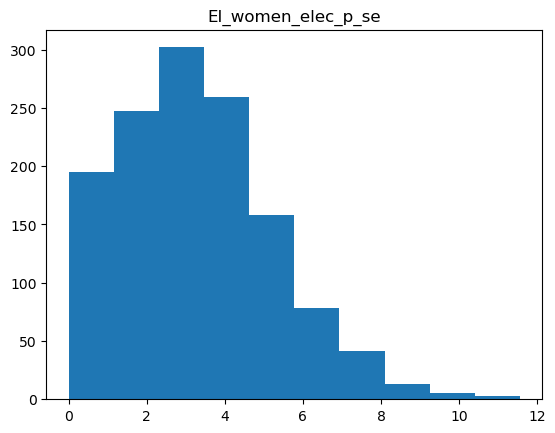

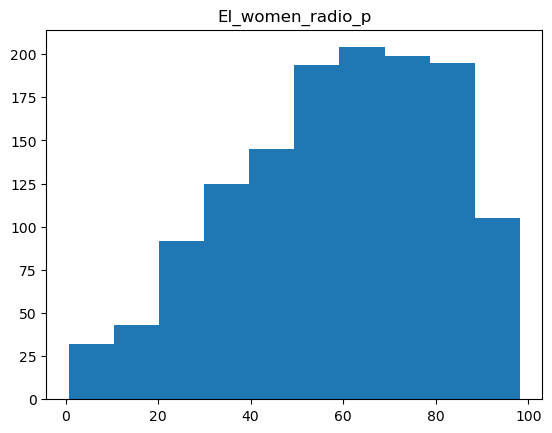

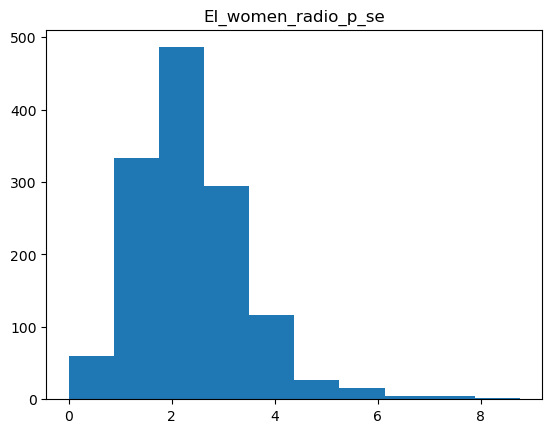

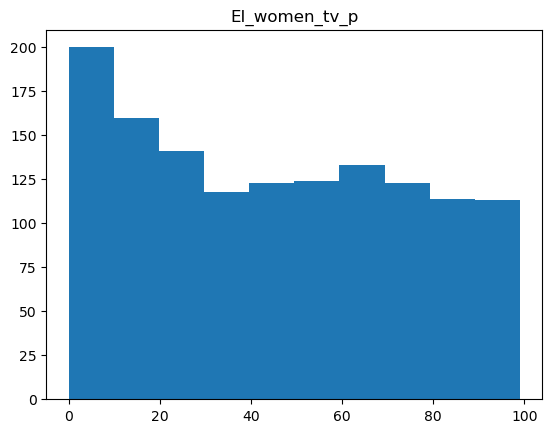

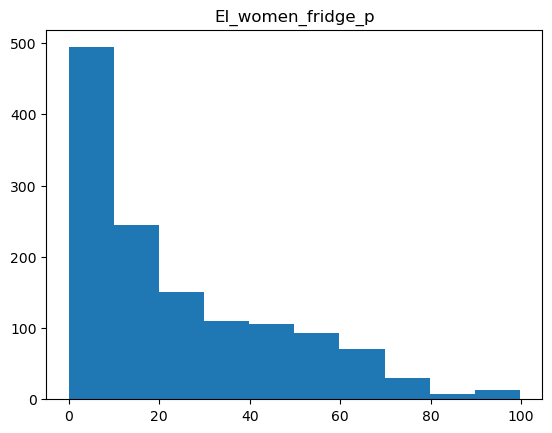

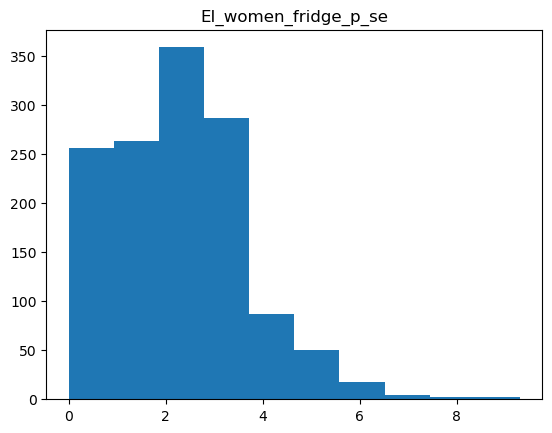

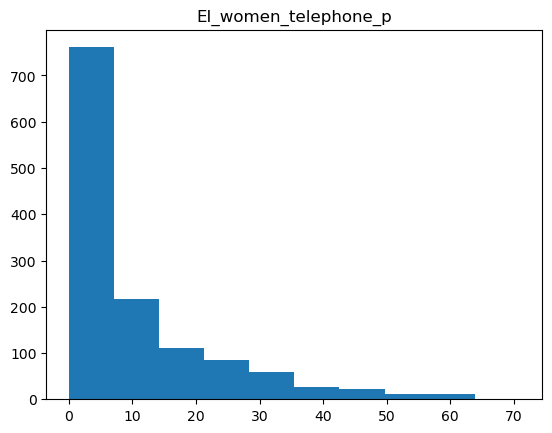

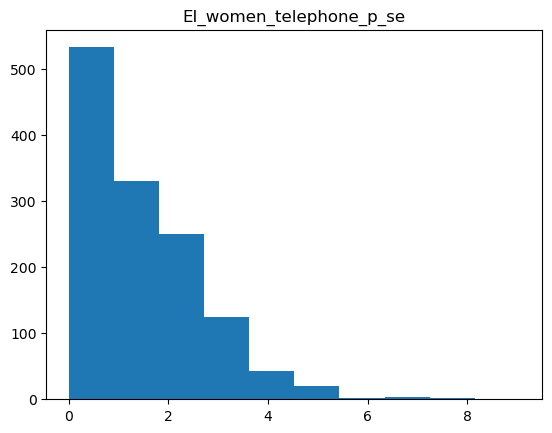

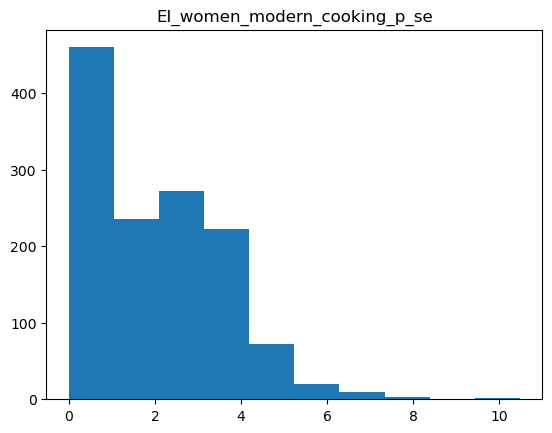

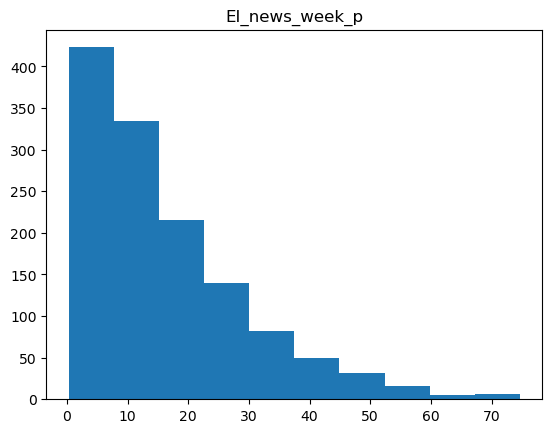

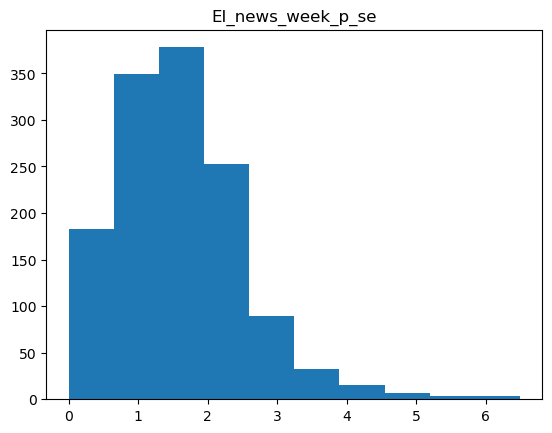

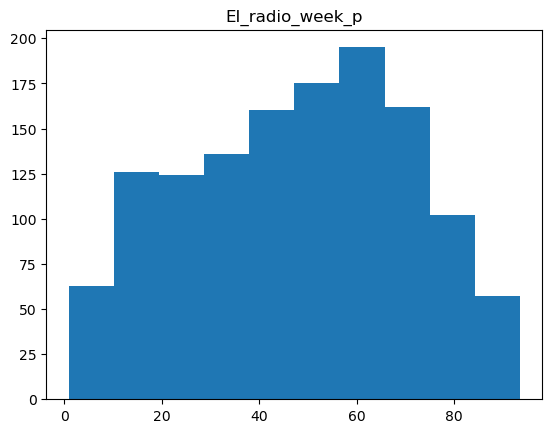

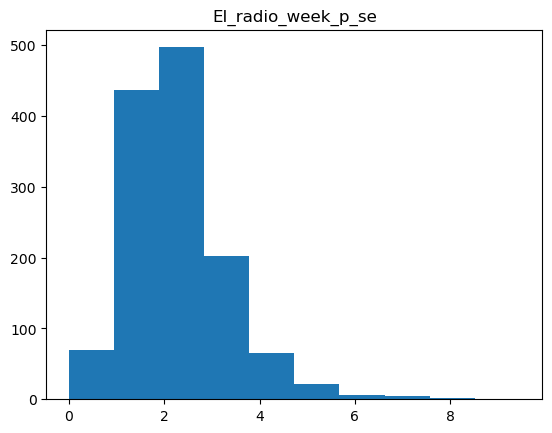

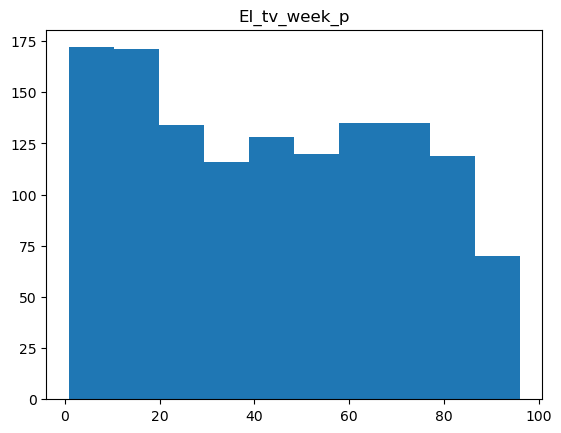

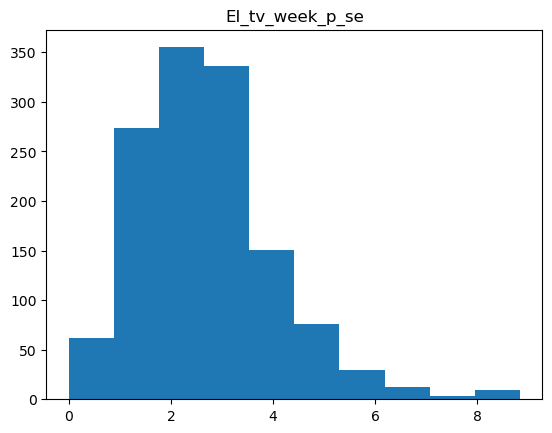

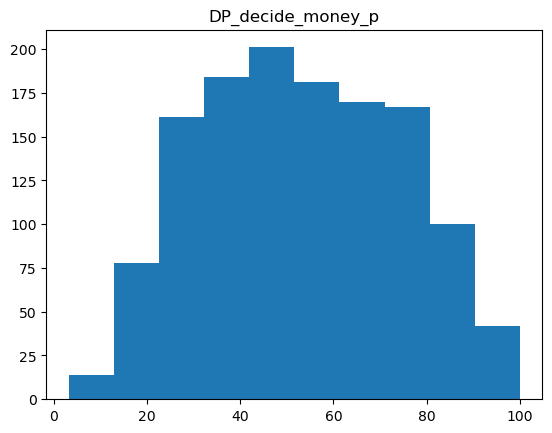

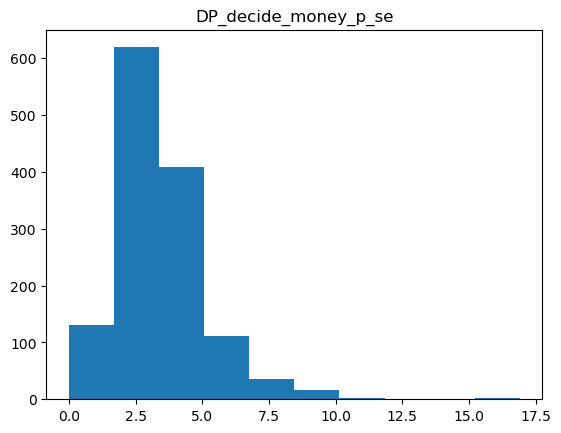

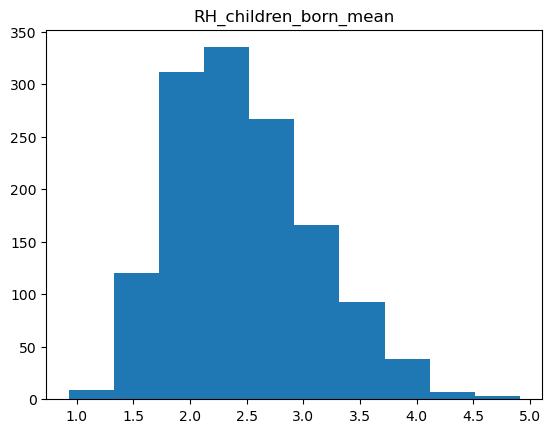

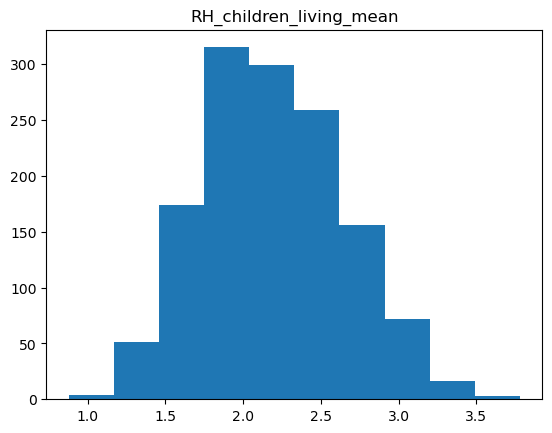

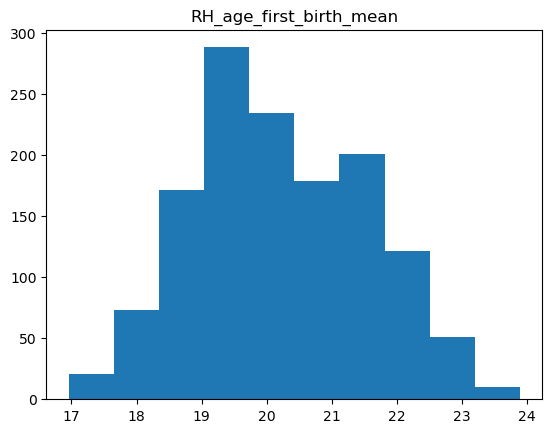

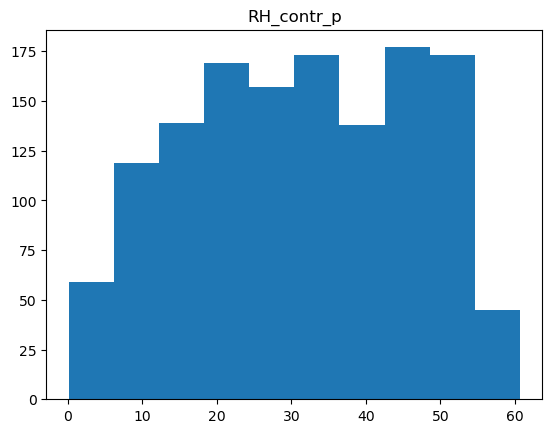

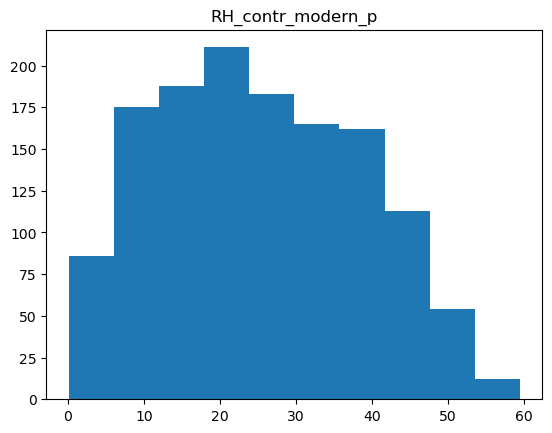

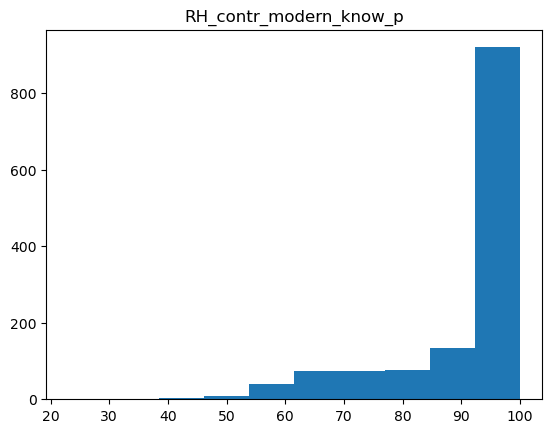

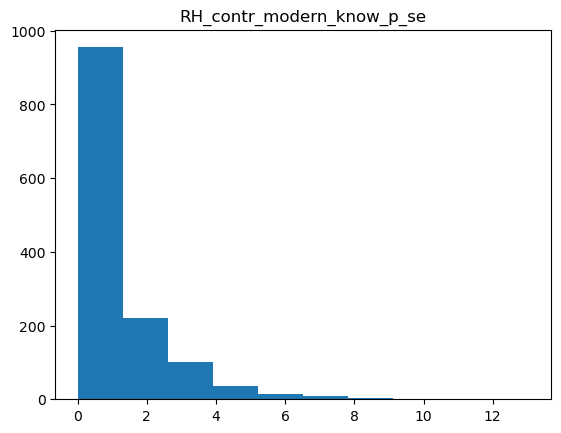

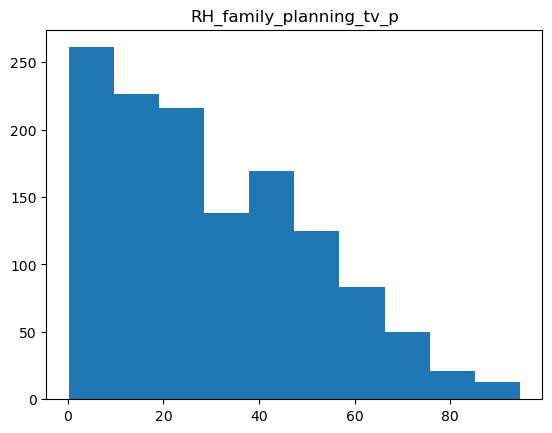

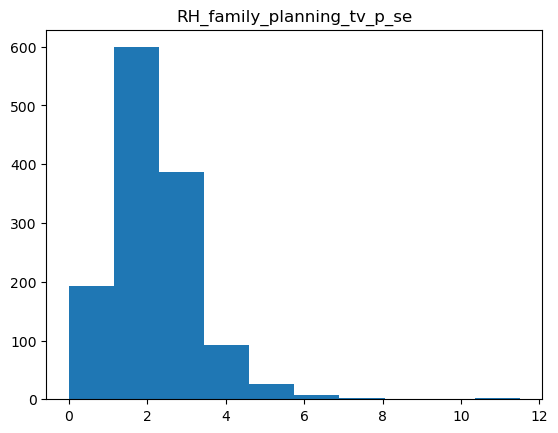

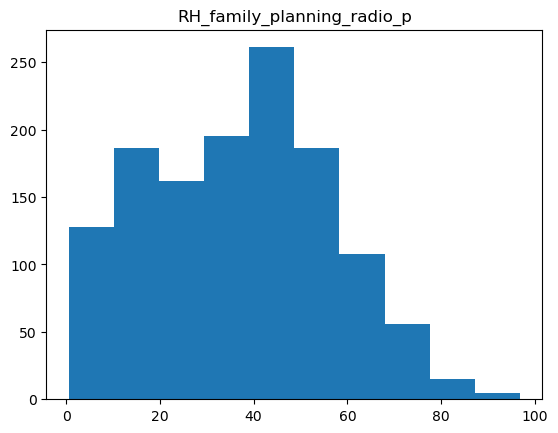

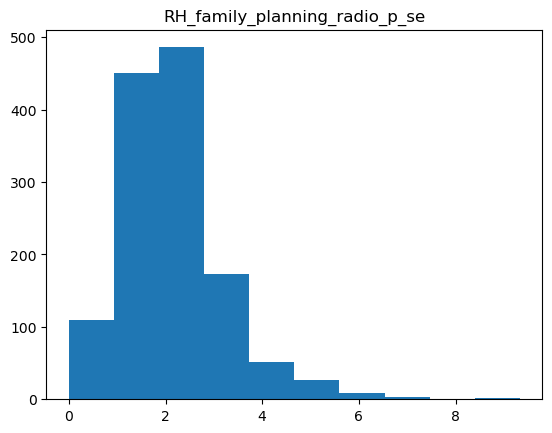

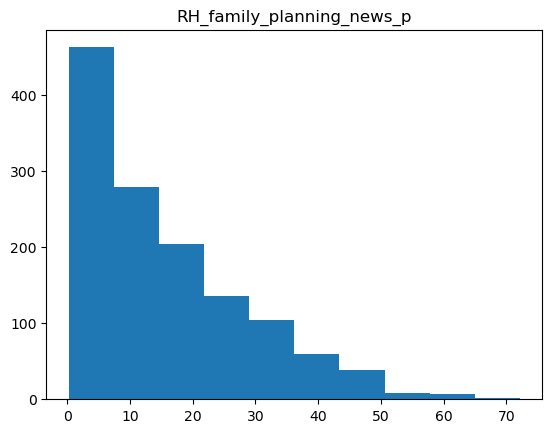

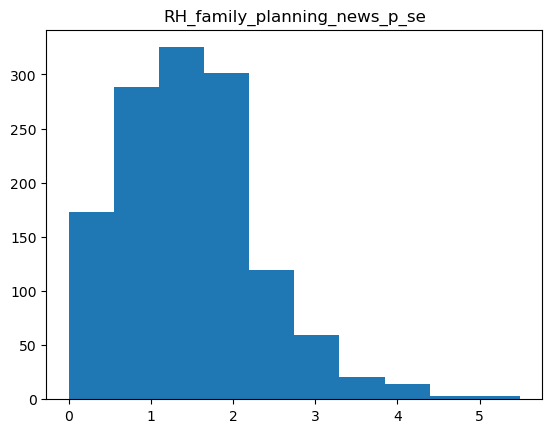

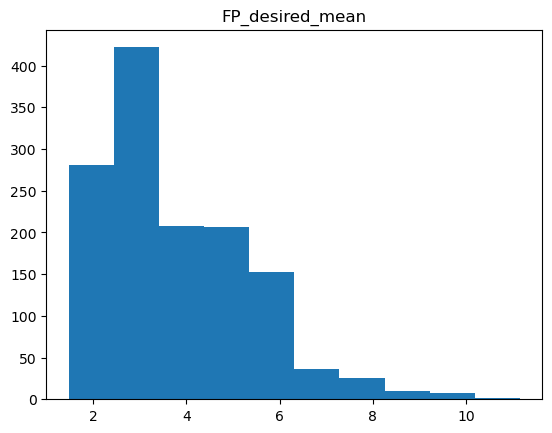

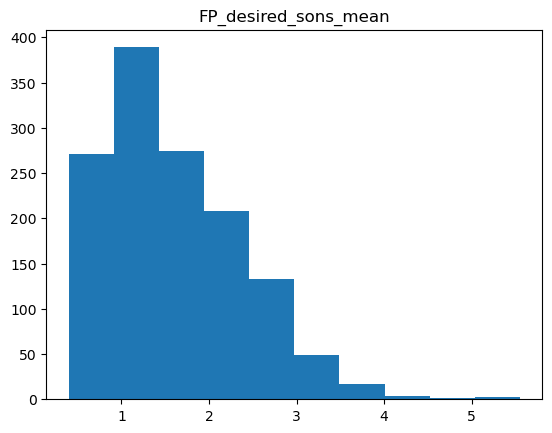

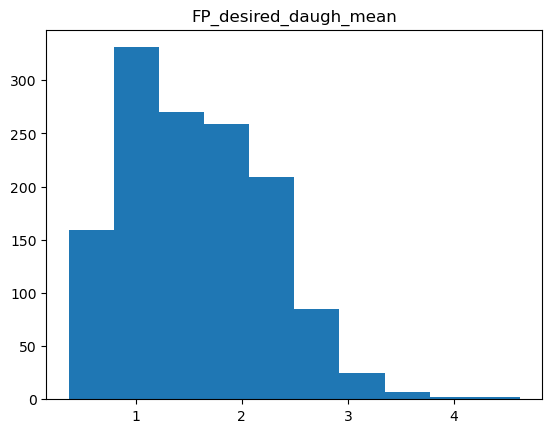

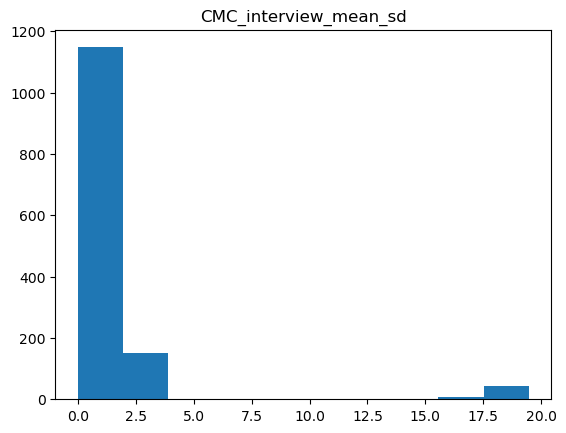

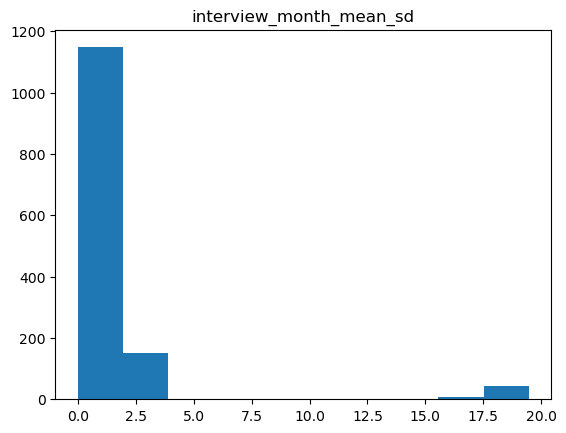

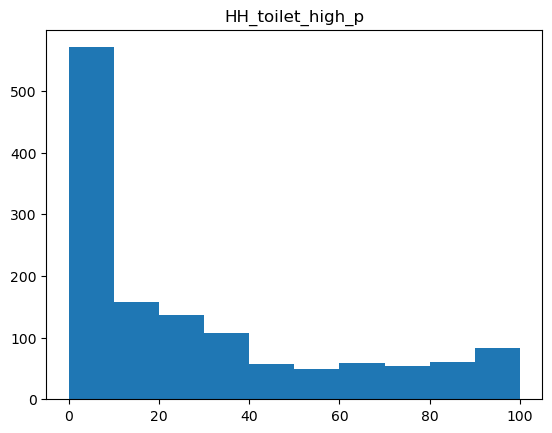

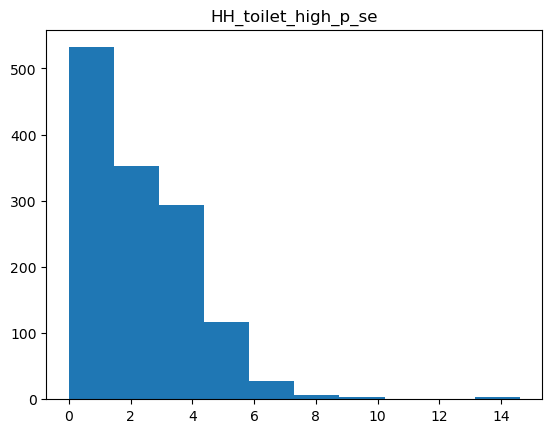

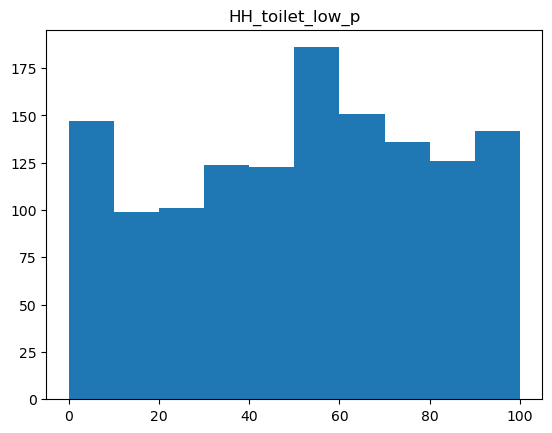

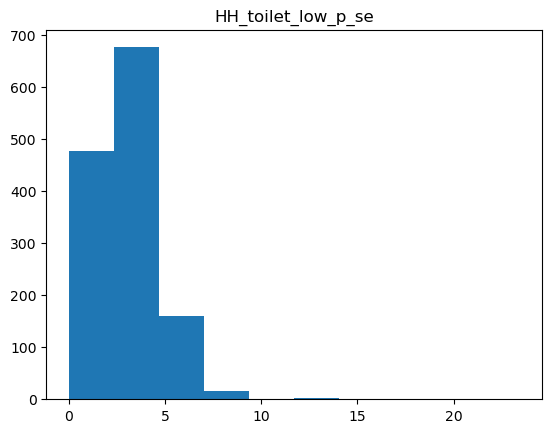

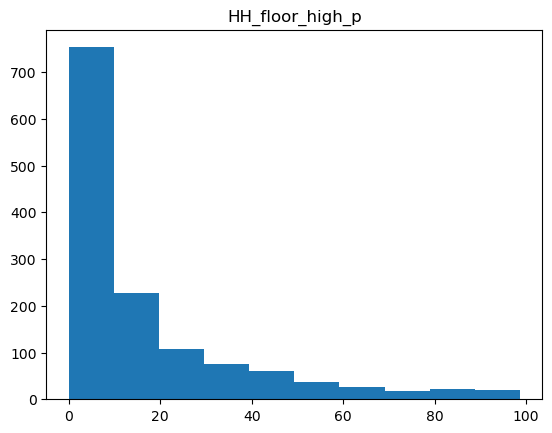

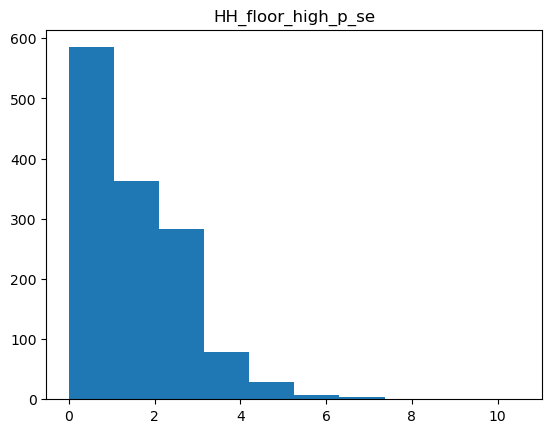

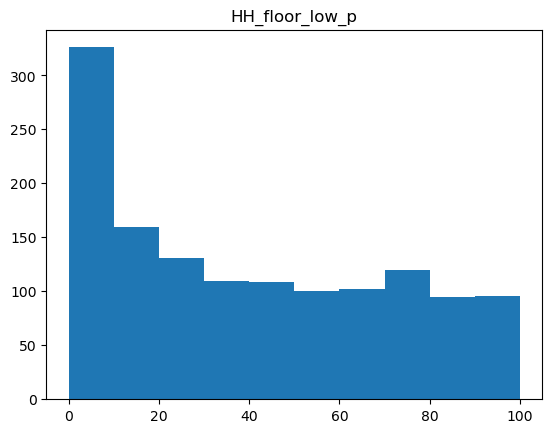

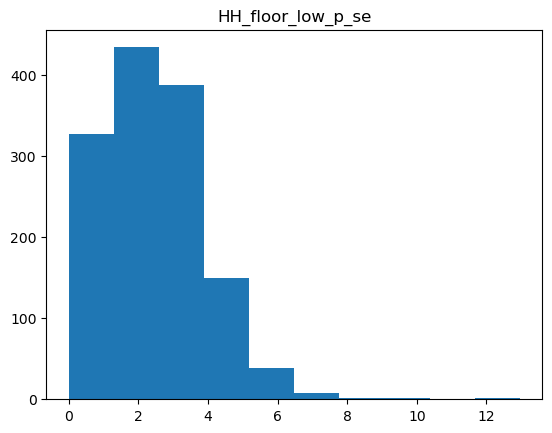

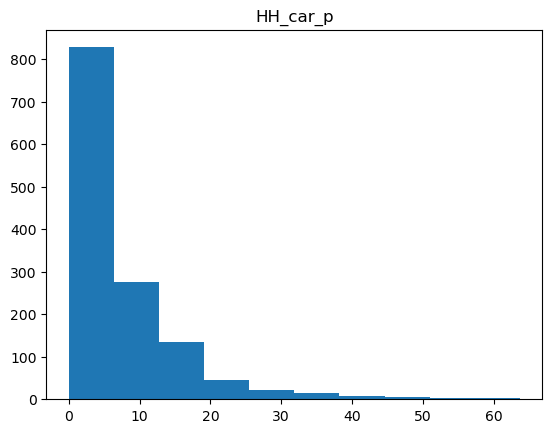

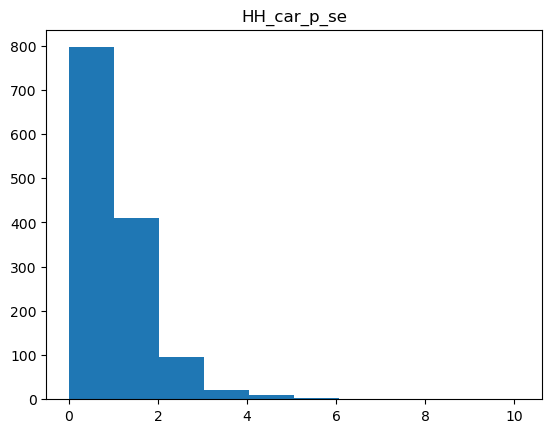

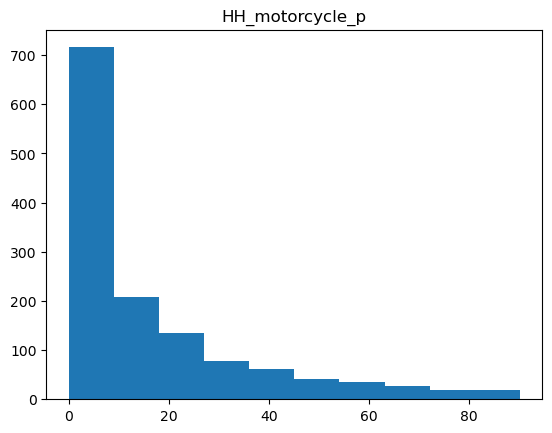

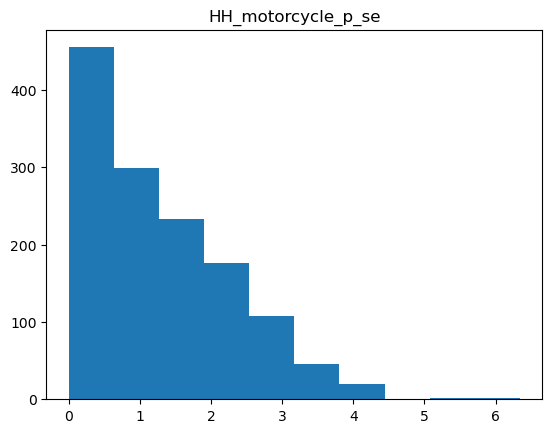

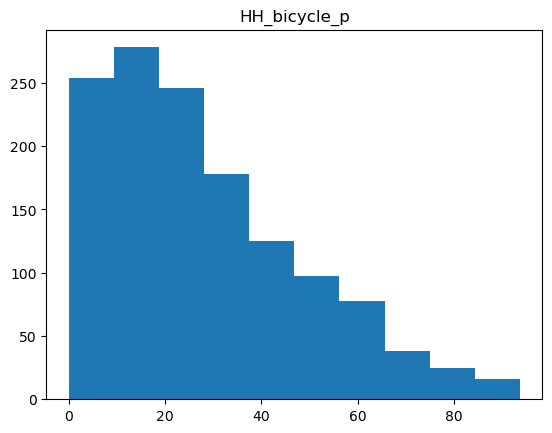

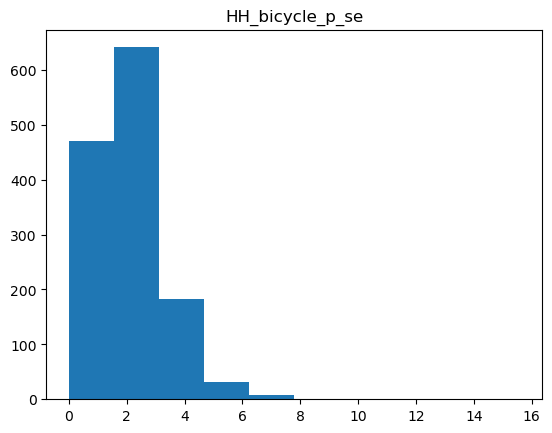

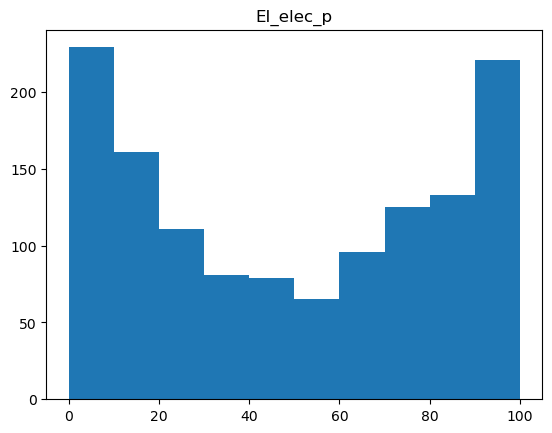

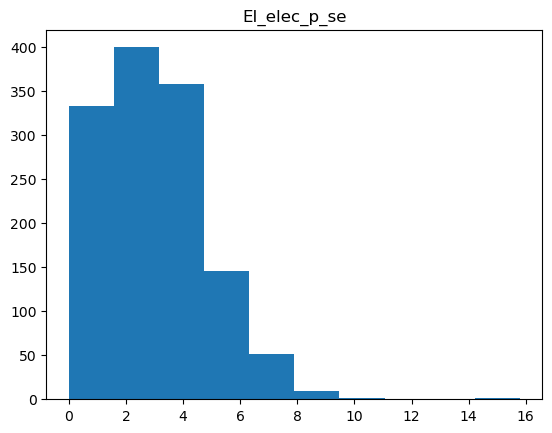

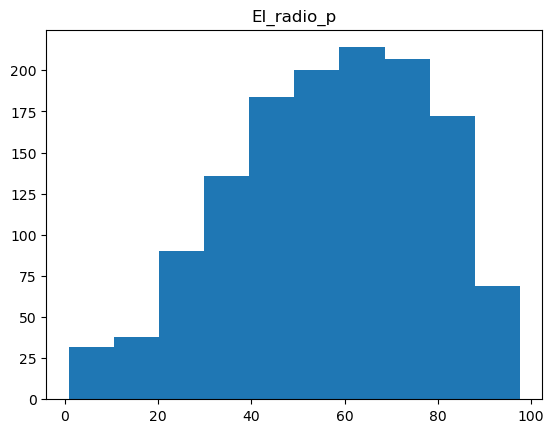

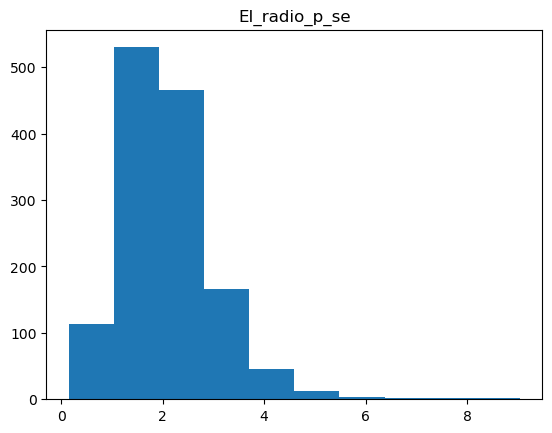

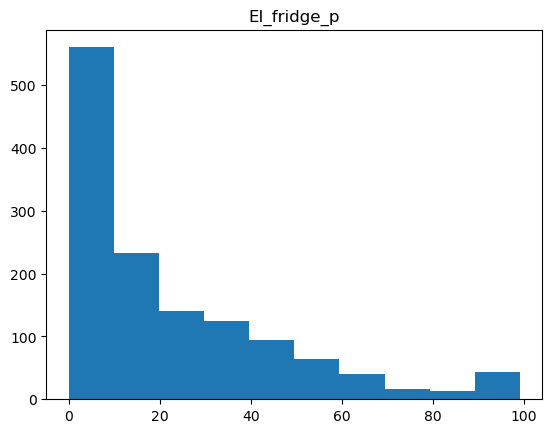

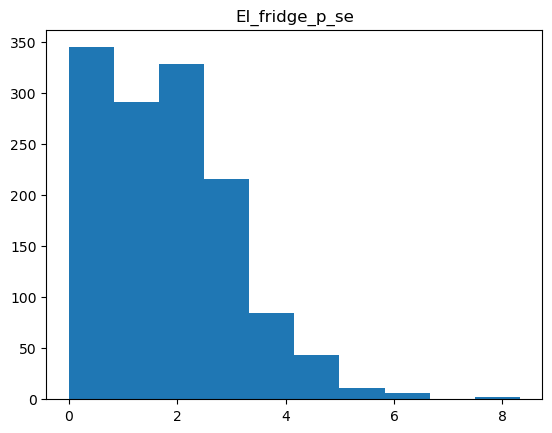

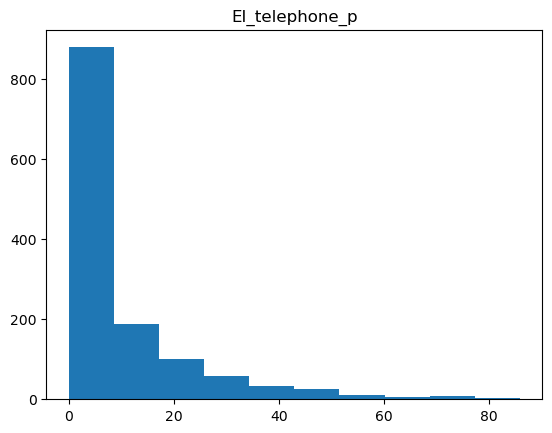

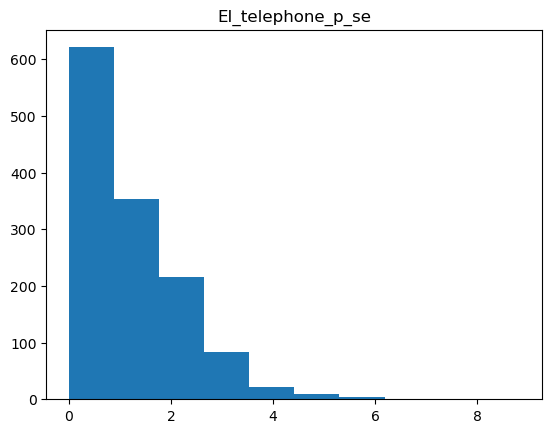

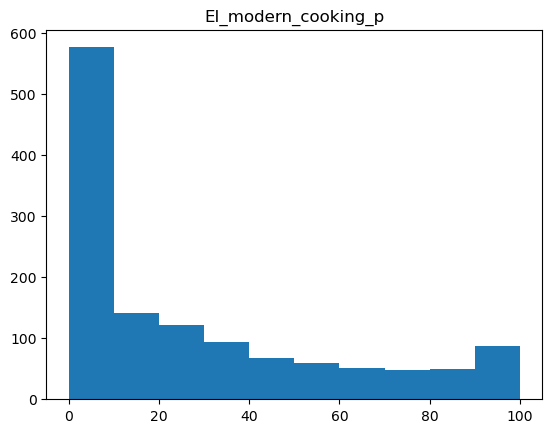

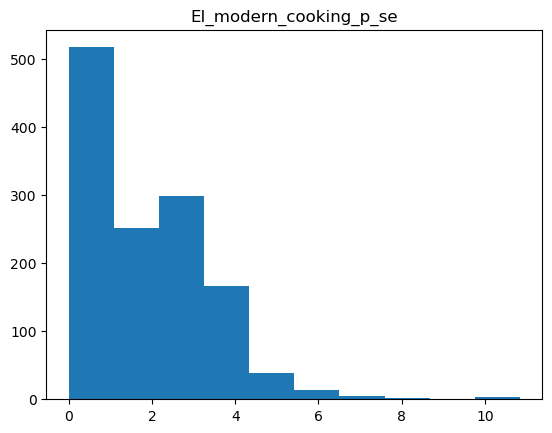

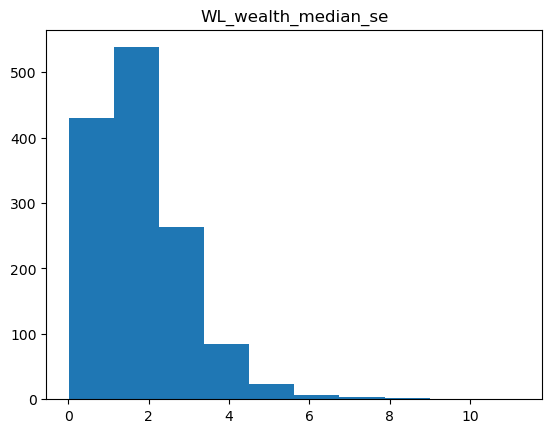

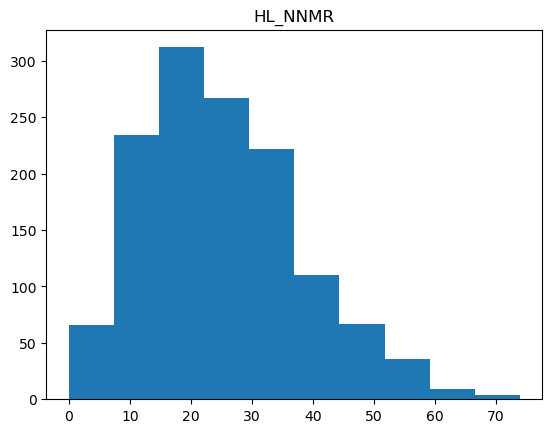

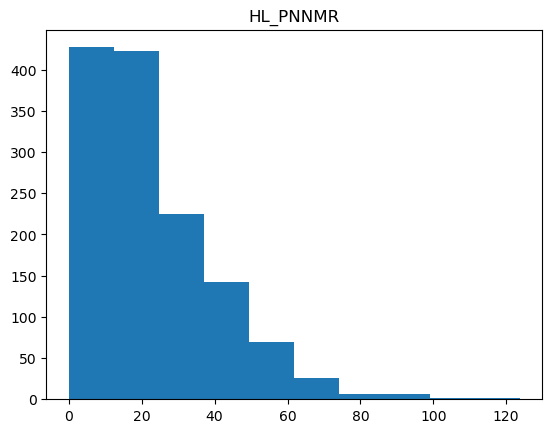

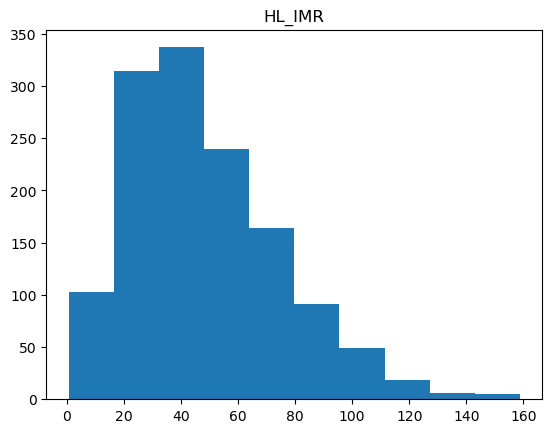

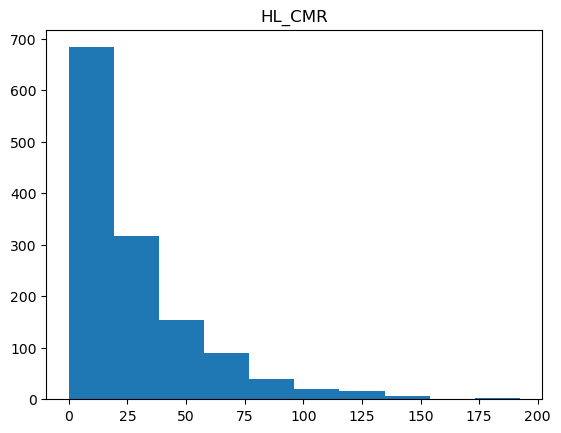

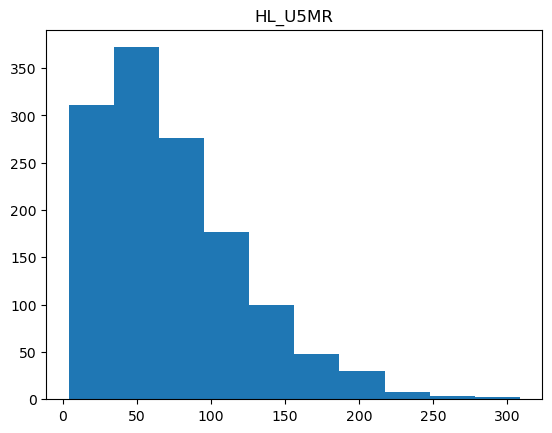

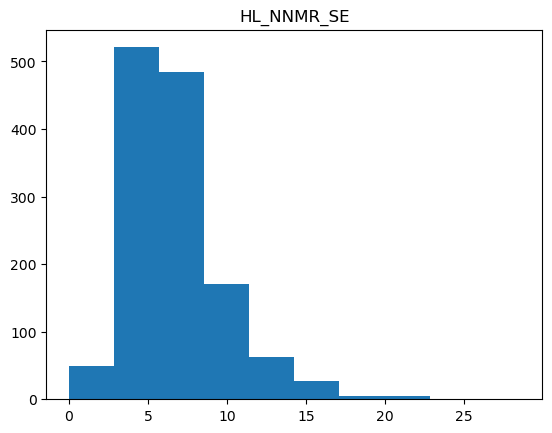

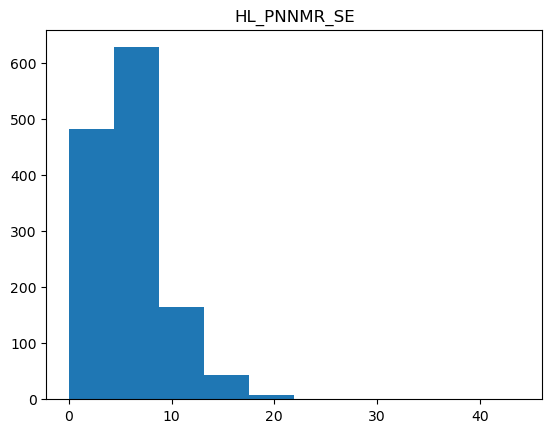

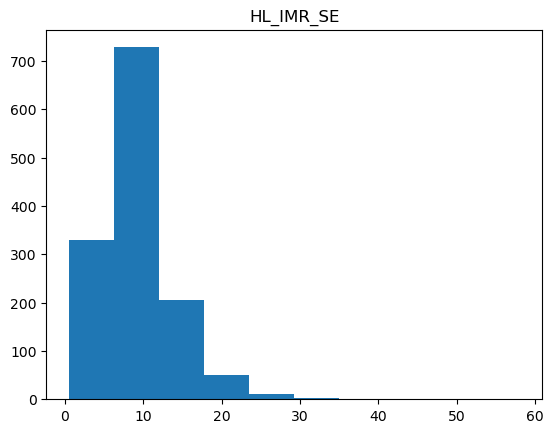

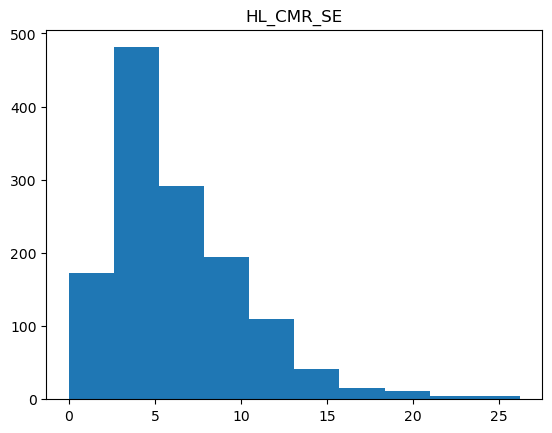

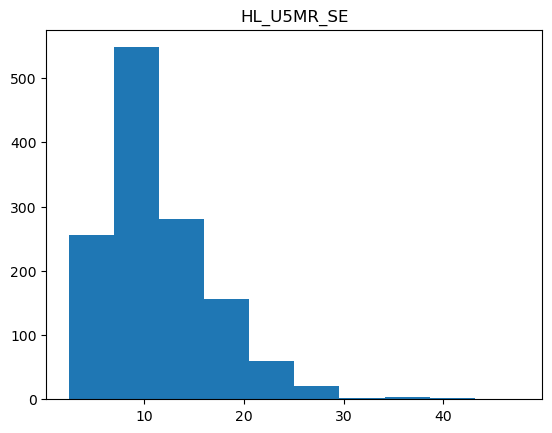

In [284]:
# Exploring other features to impute.

for c in col_to_impute:
    plt.hist(data[c])
    plt.title(c)
    plt.show()

country_name  year  DM_age_mean  DM_age_mean_se  DM_age_15.19_p  \
789        Kenya  2014          NaN             0.0             NaN   
790        Kenya  2014          NaN             0.0             NaN   
791        Kenya  2014          NaN             0.0             NaN   
792        Kenya  2014          NaN             0.0             NaN   
793        Kenya  2014          NaN             0.0             NaN   
794        Kenya  2014          NaN             0.0             NaN   
795        Kenya  2014          NaN             0.0             NaN   
796        Kenya  2014          NaN             0.0             NaN   

     DM_age_15.19_p_se  DM_age_20.24_p  DM_age_20.24_p_se  DM_age_25.29_p  \
789                0.0             NaN                0.0             NaN   
790                0.0             NaN                0.0             NaN   
791                0.0             NaN                0.0             NaN   
792                0.0             NaN                0.0             NaN   
793                0.0             NaN                0.0             NaN   
794                0.0             NaN                0.0             NaN   
795                0.0             NaN                0.0             NaN   
796                0.0             NaN                0.0             NaN   

     DM_age_25.29_p_se  ...  HL_NNMR  HL_PNNMR  HL_IMR  HL_CMR  HL_U5MR  \
789                0.0  ...    36.77     19.65   56.42   16.42    71.91   
790                0.0  ...    26.22     12.42   38.64    3.95    42.44   
791                0.0  ...    21.19     19.62   40.81   13.78    54.03   
792                0.0  ...    21.93     12.66   34.60    8.23    42.54   
793                0.0  ...    19.89     24.30   44.19   26.53    69.54   
794                0.0  ...    20.57     13.07   33.64   11.22    44.48   
795                0.0  ...    13.97     16.22   30.18   21.29    50.83   
796                0.0  ...    25.72     16.27   42.00    6.73    48.45   

     HL_NNMR_SE  HL_PNNMR_SE  HL_IMR_SE  HL_CMR_SE  HL_U5MR_SE  
789       10.27         5.58      11.51       5.90       11.99  
790        4.61         3.30       6.07       1.64        6.24  
791        3.69         4.03       5.73       2.91        6.80  
792        3.59         3.15       4.22       2.37        5.36  
793        3.05         3.18       4.20       3.33        5.54  
794        2.20         1.90       3.24       2.23        3.44  
795        3.32         3.40       4.31       4.31        5.27  
796        6.10         3.51       7.39       2.28        7.60  

[8 rows x 162 columns]

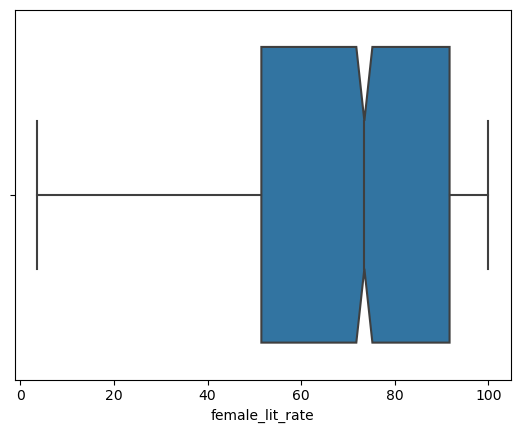

In [285]:
# Exploring the columns to impute. 'Female_literacy' is the response variable, so it is of high importance and it is 
# important to identify where the null values are.
sns.boxplot(x=data['female_lit_rate'], notch = True)
data[data['female_lit_rate'].isnull()]


In [286]:

print('Proportion of rows from Kenya with missing female literacy rate is', 
      round(8/data[data['country_name'] == 'Kenya'].shape[0], 2))


# Since a third of the entries for Kenya are missing, the country Kenya will be removed from the data.
# Kenya is the only country with missing data for the female literacy rate.

data = data[data['country_name'] != 'Kenya']



Proportion of rows from Kenya with missing female literacy rate is 0.33


In [287]:
# Female_literacy is removed from the list of col_to_impute
col_to_impute.remove('female_lit_rate')


In [288]:
# There are currently 116 columns to impute. To simplify, the null values will be replaced with the median. In some cases
# the feature has a normal distribution, so the nulls could be replaced with the mean, but for apparently normal distributions the 
# mean is equivalent to the median.

for c in col_to_impute:
    data[c] = data[c].fillna(data[c].median())


In [289]:
data.shape

(1333, 162)

After processing the null values and removing unnecessary features, the dataset has 1333 rows and 177 features. In the next phase of the EDA, looking for correlations, 177 columns to large to have an informative confusion matrix.

In [290]:
# Using the correlation matrix, the 20 features with correlation with the greatest and smallest correlation with the
# female_lit_rate response were selected

corr_matrix = data.corr()
print(corr_matrix['female_lit_rate'].sort_values(ascending = False).head(20), '\n')
print(corr_matrix['female_lit_rate'].sort_values(ascending = False).tail(20))


female_lit_rate              1.000000
RH_contr_p                   0.693272
EI_women_tv_p                0.609409
DM_age_marr_mean             0.607534
RH_contr_modern_p            0.601631
EI_news_week_p               0.595521
RH_family_planning_news_p    0.578987
EI_tv_week_p                 0.574398
EI_women_elec_p              0.551538
EI_tv_p                      0.543637
RH_age_first_birth_mean      0.527765
DM_age_diff_5minus_p         0.522856
DM_age_diff_0_p              0.521082
DM_age_diff_0_p_se           0.519075
EI_women_fridge_p            0.517646
WL_wealth_mean               0.511369
WL_wealth_median             0.501172
HH_women_toilet_high_p       0.499843
EI_modern_cooking_p          0.492170
EI_elec_p                    0.487221
Name: female_lit_rate, dtype: float64 

FF_ASFR_40.44             -0.521138
HD_size_dejure_mean       -0.523175
FF_ASFR_35.39             -0.541650
HL_IMR                    -0.544138
DM_marr_p                 -0.547379
FF_ASFR_20.24       

In [291]:
# Upon inspectation, there are 15 features with the magnitude of correlation greater than 0.6. 
# While it would be good to visualize all the features in the correlation heatmap and pair plot, it is too large a number of 
# features to see any meaningful patterns.

col_corr = corr_matrix['female_lit_rate'].sort_values(ascending = False).head(5).index
col_corr = col_corr.append(corr_matrix['female_lit_rate'].sort_values(ascending = False).tail(10).index)

col_corr.tolist()


['female_lit_rate',
 'RH_contr_p',
 'EI_women_tv_p',
 'DM_age_marr_mean',
 'RH_contr_modern_p',
 'RH_children_living_mean',
 'FF_TFR',
 'FP_desired_mean',
 'FF_GFR',
 'HL_U5MR',
 'DM_age_diff_mean',
 'HL_CMR',
 'FP_desired_sons_mean',
 'HD_children_mean',
 'RH_children_born_mean']

In [292]:
data_corr = data[[c for c in data.columns if c in col_corr]]
data_corr = data_corr.reindex(columns = col_corr)
print(data_corr.head())

corr_matrix2 = data_corr.corr()

    female_lit_rate  RH_contr_p  EI_women_tv_p  DM_age_marr_mean  \
44            86.53       20.28          55.52             20.83   
45            56.71       19.32           1.17             19.10   
46            62.26       11.66           1.83             19.98   
47            59.87        8.86           2.02             19.33   
48            89.55       17.39          51.09             21.43   

    RH_contr_modern_p  RH_children_living_mean  FF_TFR  FP_desired_mean  \
44              16.98                     1.54   4.240             3.82   
45              16.94                     2.28   6.690             3.92   
46               9.60                     2.21   6.332             4.15   
47               6.38                     2.44   6.575             4.45   
48              13.86                     1.49   3.690             3.66   

     FF_GFR  HL_U5MR  DM_age_diff_mean  HL_CMR  FP_desired_sons_mean  \
44  131.643    54.93              6.74   14.51                  1.71

/var/folders/3z/782f55t14ylb51cf2tclhh7r0000gn/T/ipykernel_72949/2540960957.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_matrix2, dtype=np.bool))


Text(0.5, 1.0, 'Correlation Heatmap of Female Literacy Rate Feature Relationships')

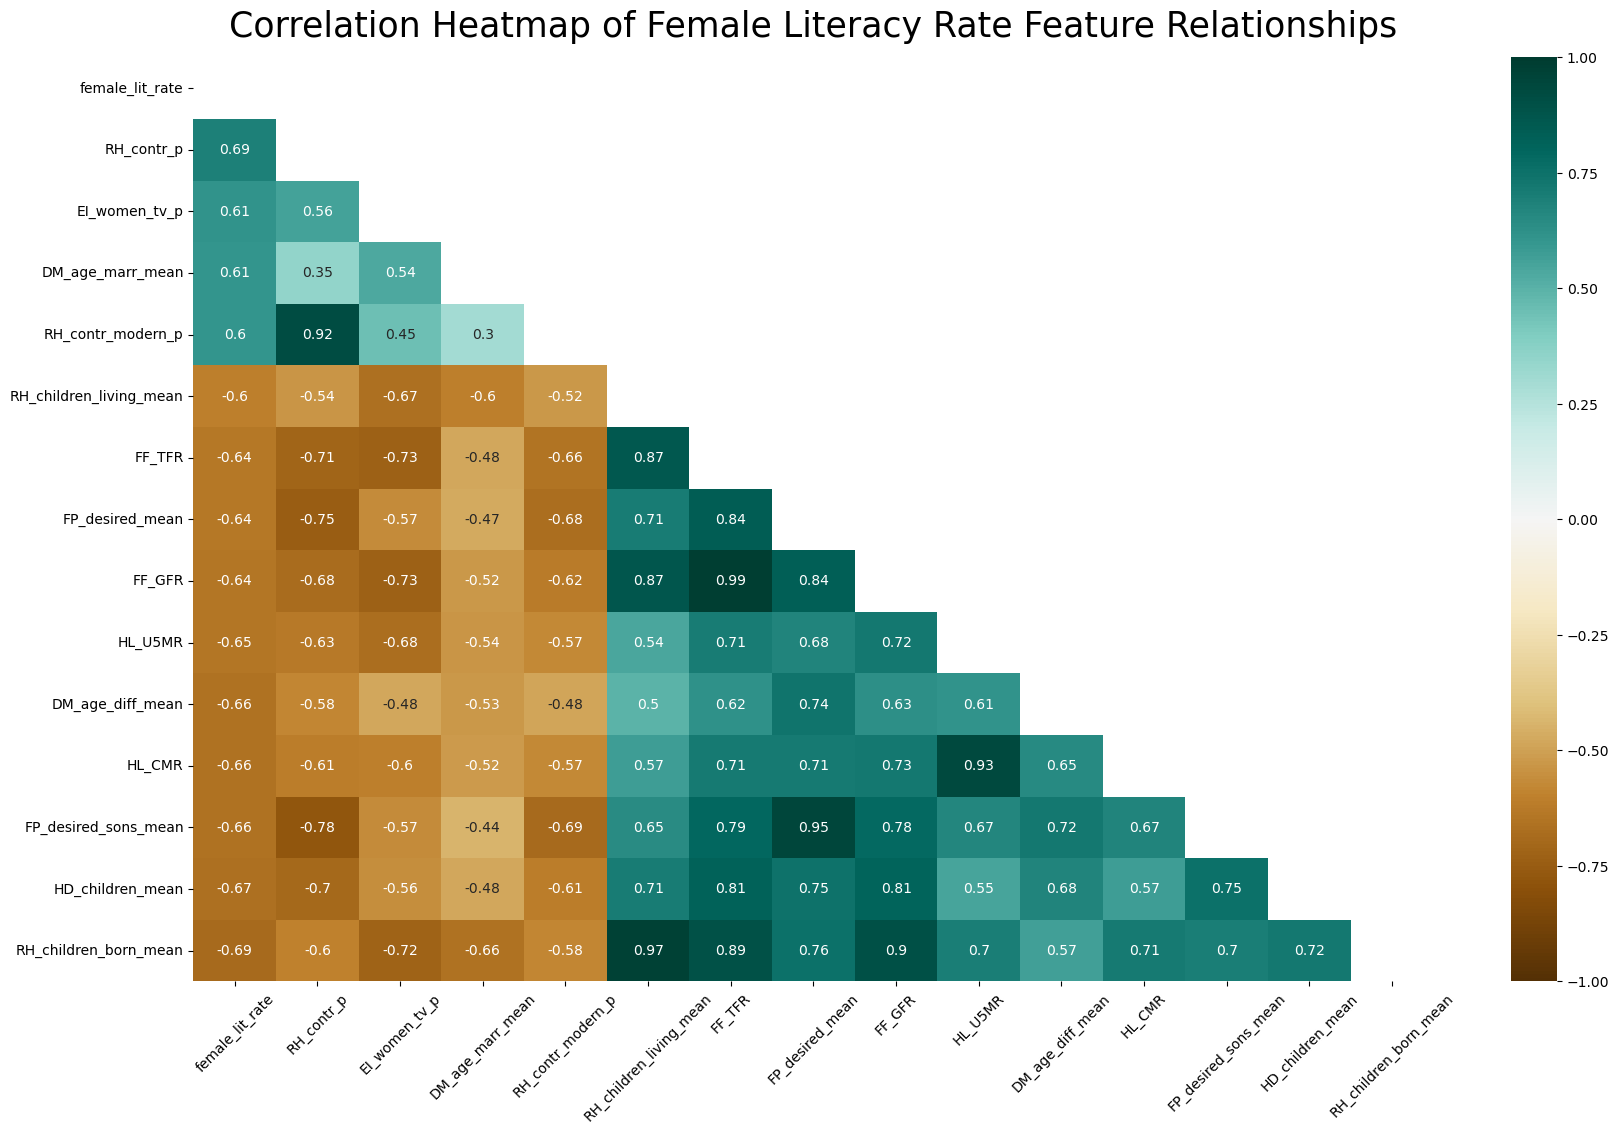

In [293]:

plt.figure(figsize=(20, 12))
mask = np.triu(np.ones_like(corr_matrix2, dtype=np.bool))
heatmap = sns.heatmap(corr_matrix2, mask = mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.xticks(rotation=45) 
heatmap.set_title('Correlation Heatmap of Female Literacy Rate Feature Relationships', fontdict={'fontsize':25}, pad=15)

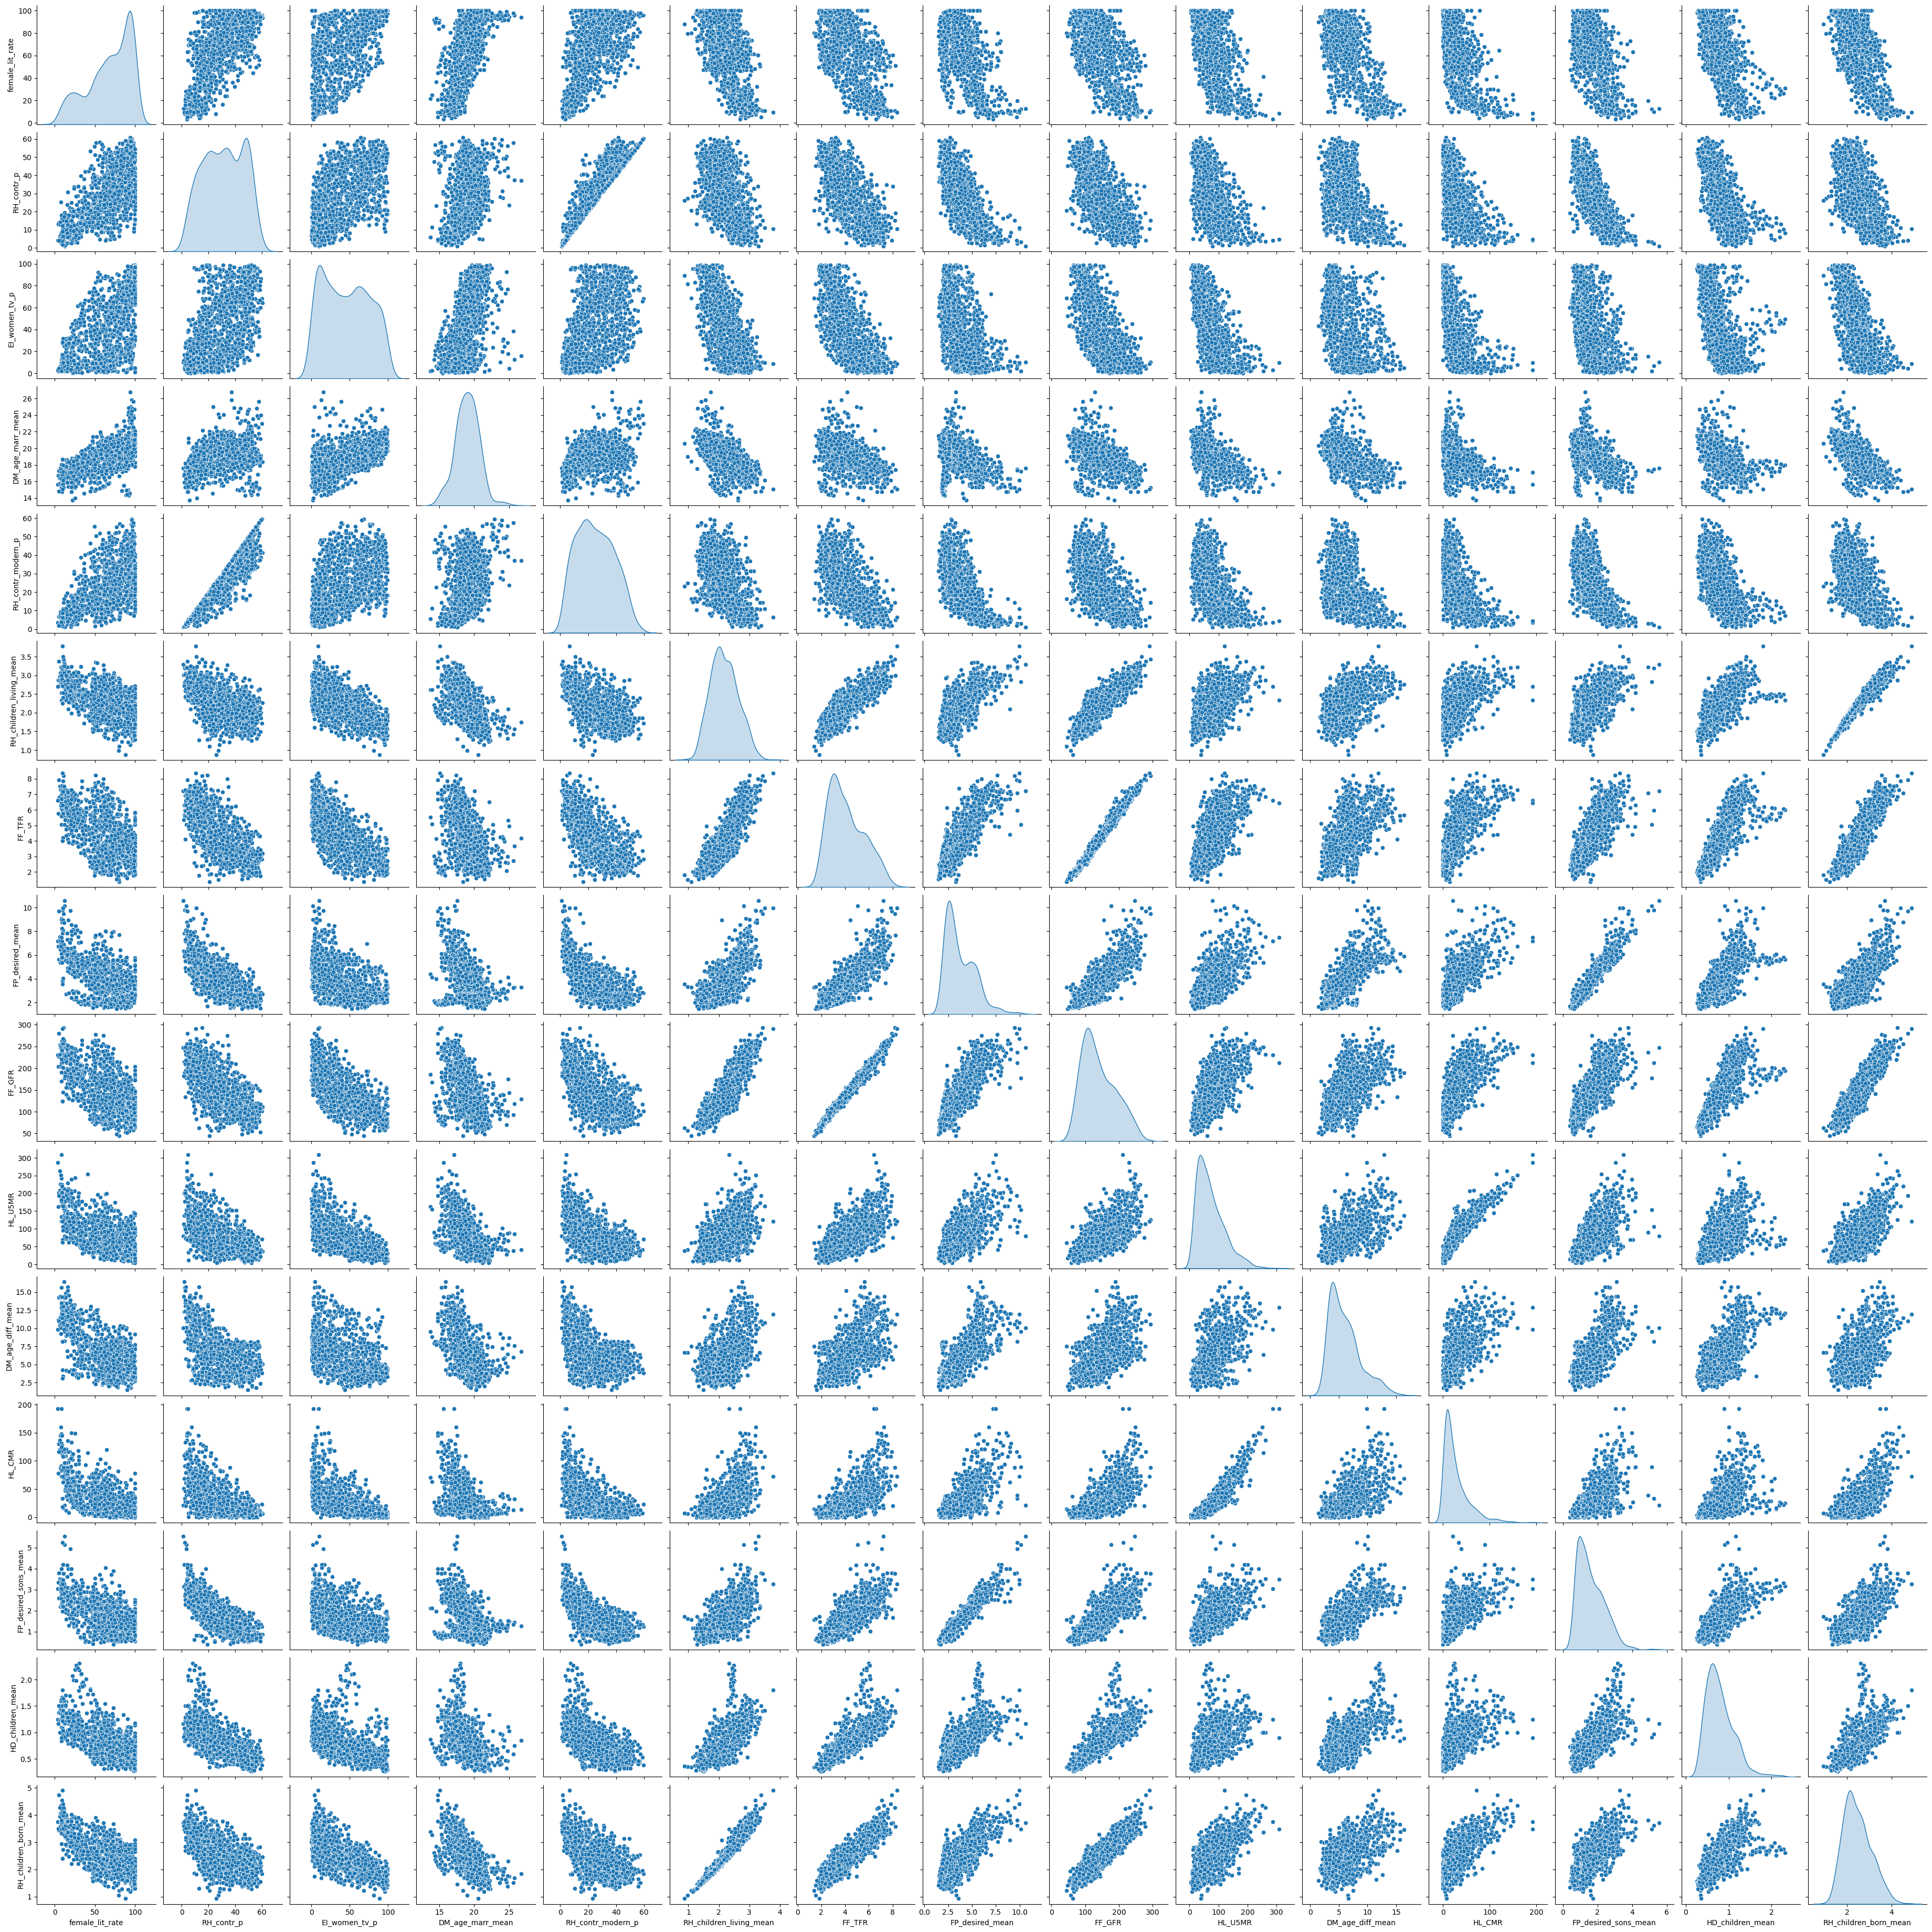

In [294]:
sns.pairplot(data_corr, diag_kind = "kde")
plt.show()

Looking at the correlation heatmap and pair plot, there is a clear collinearity (over 0.9) with some pairs of data that represent similar, but not identical indicators. Because of this they will be kept in the dataset, but I will monitor their usage in the multilinear regression model to avoid dependence between variables.


## Data Modelling: Multilinear Regression
Having selected the features with magnitudes of correlation greater tha 0.6, the multiliner regression model will
be build using forward stepwise refinement with up to k = 5 features. 

In [295]:
# Data is split into training and testing sets, with a test size of 20%
data_train, data_test = train_test_split(data_corr, test_size=0.2, random_state=42, shuffle=True)
print(len(data_train))
print(len(data_test))

1066
267


In [296]:
# The base linear regression model, k = 1. The procedure for forward stepwise refinement is to test each of the factors with 
# correlation of 0.6 or greater and rank them by R-squared in the possible model. The feature with the highest R-squared
# will be included in the model, and removed from the list of allowed factors for subsequent iterations.

allowed_factors = data_corr.columns
allowed_factors = allowed_factors.drop('female_lit_rate')
print(allowed_factors)

best = ['',0]
for p in allowed_factors:
    model  = smf.ols(formula='female_lit_rate~'+p, data=data_train).fit()
    print(p, round(model.rsquared, 2))
    if model.rsquared>best[1]:
        best = [p, round(model.rsquared, 2)]
print('\n', 'best:', best)

# Best linear regression model with one predictor is:
lmod1 = smf.ols(formula='female_lit_rate ~ RH_contr_p', data=data_train).fit()
# 'RH_contr_p' means 'Women currently using any method of contraception (%)' and is from the reproductive health 
# category of indicators

lmod1.summary()

Index(['RH_contr_p', 'EI_women_tv_p', 'DM_age_marr_mean', 'RH_contr_modern_p',
       'RH_children_living_mean', 'FF_TFR', 'FP_desired_mean', 'FF_GFR',
       'HL_U5MR', 'DM_age_diff_mean', 'HL_CMR', 'FP_desired_sons_mean',
       'HD_children_mean', 'RH_children_born_mean'],
      dtype='object')
RH_contr_p 0.49
EI_women_tv_p 0.39
DM_age_marr_mean 0.38
RH_contr_modern_p 0.37
RH_children_living_mean 0.36
FF_TFR 0.4
FP_desired_mean 0.4
FF_GFR 0.41
HL_U5MR 0.42
DM_age_diff_mean 0.43
HL_CMR 0.43
FP_desired_sons_mean 0.43
HD_children_mean 0.45
RH_children_born_mean 0.47

 best: ['RH_contr_p', 0.49]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        female_lit_rate   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     1027.
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          2.47e-158
Time:                        18:21:38   Log-Likelihood:                -4647.3
No. Observations:                1066   AIC:                             9299.
Df Residuals:                    1064   BIC:                             9309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.3387      1.334     22.000      0.000      26.722      31.955
RH_contr_p     1.2340      0.038     32.054      0.000       1.159       1.310
==============================================================================
Omnibus:                        1.932   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.381   Jarque-Bera (JB):                1.826
Skew:                           0.031   Prob(JB):                        0.401
Kurtosis:                       2.807   Cond. No.                         79.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [297]:
# Feature selection for k = 2 features

allowed_factors.drop('RH_contr_p')

best = ['',0]
for p in allowed_factors:
    model  = smf.ols(formula='female_lit_rate ~ RH_contr_p +'+p, data=data_train).fit()
    print(p, round(model.rsquared, 2))
    if model.rsquared>best[1]:
        best = [p, round(model.rsquared, 2)]
print('\n', 'best:', best)

# Best linear regression model with two predictors is:
lmod2 = smf.ols(formula='female_lit_rate ~ RH_contr_p + DM_age_marr_mean', data=data_train).fit()
# 'DM_age_marr_mean' is 'Female average age at marriage' from the category of Individual Demographic Information
lmod2.summary()

RH_contr_p 0.49
EI_women_tv_p 0.56
DM_age_marr_mean 0.64
RH_contr_modern_p 0.5
RH_children_living_mean 0.56
FF_TFR 0.53
FP_desired_mean 0.52
FF_GFR 0.54
HL_U5MR 0.56
DM_age_diff_mean 0.59
HL_CMR 0.57
FP_desired_sons_mean 0.52
HD_children_mean 0.55
RH_children_born_mean 0.6

 best: ['DM_age_marr_mean', 0.64]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        female_lit_rate   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     949.0
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          3.44e-237
Time:                        18:21:38   Log-Likelihood:                -4461.5
No. Observations:                1066   AIC:                             8929.
Df Residuals:                    1063   BIC:                             8944.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -84.8732      5.539    -15.323      0.000     -95.742     -74.005
RH_contr_p           0.9609      0.035     27.565      0.000       0.893       1.029
DM_age_marr_mean     6.4619      0.307     21.055      0.000       5.860       7.064
==============================================================================
Omnibus:                        0.753   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.686   Jarque-Bera (JB):                0.691
Skew:                           0.061   Prob(JB):                        0.708
Kurtosis:                       3.029   Cond. No.                         443.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [298]:
# Feature selection for k = 3 features
allowed_factors.drop('DM_age_marr_mean')

best = ['',0]
for p in allowed_factors:
    model  = smf.ols(formula='female_lit_rate ~ RH_contr_p + DM_age_marr_mean +'+p, data=data_train).fit()
    print(p, round(model.rsquared, 2))
    if model.rsquared>best[1]:
        best = [p, round(model.rsquared, 2)]
print('\n', 'best:', best)

# Best linear regression model with three predictors is:
lmod3 = smf.ols(formula='female_lit_rate ~ RH_contr_p + DM_age_marr_mean + DM_age_diff_mean', data=data_train).fit()
# 'DM_age_diff_mean' is also from the category of Individual Demographic Information. It means 'Average difference 
# between women and hustband/partner, For currently married women aged 15-24'
lmod3.summary()

RH_contr_p 0.64
EI_women_tv_p 0.65
DM_age_marr_mean 0.64
RH_contr_modern_p 0.65
RH_children_living_mean 0.65
FF_TFR 0.64
FP_desired_mean 0.64
FF_GFR 0.64
HL_U5MR 0.65
DM_age_diff_mean 0.67
HL_CMR 0.66
FP_desired_sons_mean 0.65
HD_children_mean 0.65
RH_children_born_mean 0.65

 best: ['DM_age_diff_mean', 0.67]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        female_lit_rate   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     706.5
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          2.00e-252
Time:                        18:21:38   Log-Likelihood:                -4422.7
No. Observations:                1066   AIC:                             8853.
Df Residuals:                    1062   BIC:                             8873.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -42.9327      7.106     -6.042      0.000     -56.875     -28.990
RH_contr_p           0.7974      0.038     20.836      0.000       0.722       0.872
DM_age_marr_mean     5.1782      0.329     15.741      0.000       4.533       5.824
DM_age_diff_mean    -2.0569      0.230     -8.955      0.000      -2.508      -1.606
==============================================================================
Omnibus:                        2.729   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.256   Jarque-Bera (JB):                2.890
Skew:                          -0.031   Prob(JB):                        0.236
Kurtosis:                       3.247   Cond. No.                         594.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [299]:
# Feature selection for k = 4 features
allowed_factors.drop('DM_age_diff_mean')

best = ['',0]
for p in allowed_factors:
    model  = smf.ols(formula='female_lit_rate ~ RH_contr_p + DM_age_marr_mean + DM_age_diff_mean+'+p, 
                     data=data_train).fit()
    print(p, round(model.rsquared, 3))
    if model.rsquared>best[1]:
        best = [p, round(model.rsquared, 3)]
print('\n', 'best:', best)

# Best linear regression model with four predictors is:
lmod4 = smf.ols(formula='female_lit_rate ~ RH_contr_p + DM_age_marr_mean + DM_age_diff_mean + EI_women_tv_p', 
              data=data_train).fit()
# 'EI_women_tv_p' means 'Women watching TV at least once a week (%)' from the Energy and Information category.
lmod4.summary()



RH_contr_p 0.666
EI_women_tv_p 0.677
DM_age_marr_mean 0.666
RH_contr_modern_p 0.669
RH_children_living_mean 0.669
FF_TFR 0.666
FP_desired_mean 0.668
FF_GFR 0.666
HL_U5MR 0.671
DM_age_diff_mean 0.666
HL_CMR 0.673
FP_desired_sons_mean 0.666
HD_children_mean 0.67
RH_children_born_mean 0.676

 best: ['EI_women_tv_p', 0.677]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        female_lit_rate   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     556.0
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          1.46e-258
Time:                        18:21:38   Log-Likelihood:                -4405.2
No. Observations:                1066   AIC:                             8820.
Df Residuals:                    1061   BIC:                             8845.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -29.2870      7.357     -3.981      0.000     -43.723     -14.851
RH_contr_p           0.6953      0.041     16.811      0.000       0.614       0.776
DM_age_marr_mean     4.3132      0.355     12.160      0.000       3.617       5.009
DM_age_diff_mean    -2.0253      0.226     -8.957      0.000      -2.469      -1.582
EI_women_tv_p        0.1277      0.021      5.966      0.000       0.086       0.170
==============================================================================
Omnibus:                        6.656   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                8.642
Skew:                           0.032   Prob(JB):                       0.0133
Kurtosis:                       3.436   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [300]:
# Feature selection for k = 5 features
allowed_factors.drop('EI_women_tv_p')

best = ['',0]
for p in allowed_factors:
    model  = smf.ols(formula='female_lit_rate ~ RH_contr_p + DM_age_marr_mean + DM_age_diff_mean  + EI_women_tv_p+'+p, 
                     data=data_train).fit()
    print(p, round(model.rsquared, 3))
    if model.rsquared>best[1]:
        best = [p, round(model.rsquared, 3)]
print('\n', 'best:', best)

# Best linear regression model with five predictors is:
lmod5 = smf.ols(formula='female_lit_rate ~ RH_contr_p + DM_age_marr_mean + DM_age_diff_mean + EI_women_tv_p + FP_desired_mean', 
               data=data_train).fit()
# 'FP_desired_mean' is the 'Average ideal number of children for all women', from Fertility Preferences category of indicator.
lmod5.summary()


RH_contr_p 0.677
EI_women_tv_p 0.677
DM_age_marr_mean 0.677
RH_contr_modern_p 0.678
RH_children_living_mean 0.677
FF_TFR 0.679
FP_desired_mean 0.681
FF_GFR 0.679
HL_U5MR 0.678
DM_age_diff_mean 0.677
HL_CMR 0.68
FP_desired_sons_mean 0.677
HD_children_mean 0.679
RH_children_born_mean 0.681

 best: ['FP_desired_mean', 0.681]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        female_lit_rate   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     452.0
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          8.16e-260
Time:                        18:21:38   Log-Likelihood:                -4399.0
No. Observations:                1066   AIC:                             8810.
Df Residuals:                    1060   BIC:                             8840.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -37.8693      7.716     -4.908      0.000     -53.011     -22.728
RH_contr_p           0.7782      0.047     16.404      0.000       0.685       0.871
DM_age_marr_mean     4.3744      0.353     12.383      0.000       3.681       5.068
DM_age_diff_mean    -2.4831      0.260     -9.549      0.000      -2.993      -1.973
EI_women_tv_p        0.1387      0.022      6.447      0.000       0.096       0.181
FP_desired_mean      1.8744      0.534      3.508      0.000       0.826       2.923
==============================================================================
Omnibus:                       10.036   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               13.306
Skew:                           0.099   Prob(JB):                      0.00129
Kurtosis:                       3.510   Cond. No.                     1.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Cross-validation and visualization of results
The five multilinear models are cross validated using the test data, and the results are show in a plot comparing the models fitted to the training and test data, with respect to the R-squared scores.

By visual inspection, it is clear that the one variable model is poorly fit, and k = 2 through k = 5 show improvement in both training and test fits, however, the improvement is slight after 3 predictors, and any subsequent improvements in R-squared does not justify the added complexity.

# Conclusions
Using forward stepwise refinement up to k = 5, the best multilinear regression model is with 3 predictors: rate of contraception use, female marriage age, and the age difference between spouses. Increases in contraception use and later marriage for females are associated with higher female literacy rates, while larger age differences between spouses is associated with lowere female literacy rates.

In [301]:
# Testing the model

test1_r2adj = r2_score(lmod1.predict(data_test), data_test['female_lit_rate'])
test2_r2adj = r2_score(lmod2.predict(data_test), data_test['female_lit_rate'])
test3_r2adj = r2_score(lmod3.predict(data_test), data_test['female_lit_rate'])
test4_r2adj = r2_score(lmod4.predict(data_test), data_test['female_lit_rate'])
test5_r2adj = r2_score(lmod5.predict(data_test), data_test['female_lit_rate'])



/var/folders/3z/782f55t14ylb51cf2tclhh7r0000gn/T/ipykernel_72949/3864118990.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(k, adjr2_train, 'go-', linewidth=2, markersize=8, color = 'blue')
/var/folders/3z/782f55t14ylb51cf2tclhh7r0000gn/T/ipykernel_72949/3864118990.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(k, adjr2_test, 'go-', linewidth=2, markersize=8, color = 'orange')


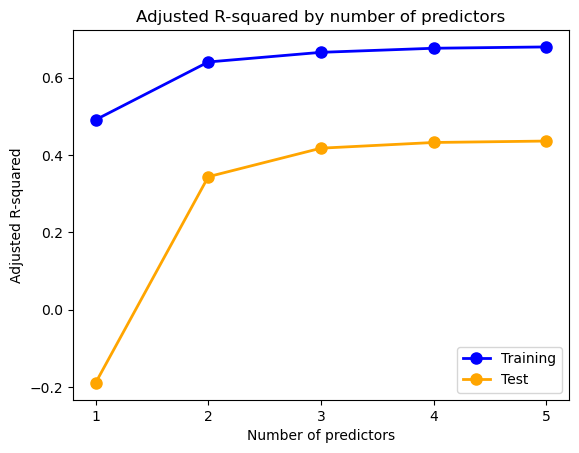

In [302]:
k = [1, 2, 3, 4, 5]
adjr2_train = [lmod1.rsquared_adj, lmod2.rsquared_adj, lmod3.rsquared_adj, lmod4.rsquared_adj, lmod5.rsquared_adj]
adjr2_test = [test1_r2adj, test2_r2adj, test3_r2adj, test4_r2adj, test5_r2adj]

plt.plot(k, adjr2_train, 'go-', linewidth=2, markersize=8, color = 'blue')
plt.plot(k, adjr2_test, 'go-', linewidth=2, markersize=8, color = 'orange')
plt.title('Adjusted R-squared by number of predictors')
plt.xlabel('Number of predictors')
plt.ylabel('Adjusted R-squared')
plt.legend(['Training', 'Test'])
plt.xticks(k)
plt.show()


In [336]:
# Summary of the best multilinear regression model.
lmod3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        female_lit_rate   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     706.5
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          2.00e-252
Time:                        18:58:30   Log-Likelihood:                -4422.7
No. Observations:                1066   AIC:                             8853.
Df Residuals:                    1062   BIC:                             8873.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -42.9327      7.106     -6.042      0.000     -56.875     -28.990
RH_contr_p           0.7974      0.038     20.836      0.000       0.722       0.872
DM_age_marr_mean     5.1782      0.329     15.741      0.000       4.533       5.824
DM_age_diff_mean    -2.0569      0.230     -8.955      0.000      -2.508      -1.606
==============================================================================
Omnibus:                        2.729   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.256   Jarque-Bera (JB):                2.890
Skew:                          -0.031   Prob(JB):                        0.236
Kurtosis:                       3.247   Cond. No.                         594.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [337]:
test3_r2adj

0.4173962236537312

## Data Modeling: Decision Trees

Decision trees regression is a different method for modeling regression data. Initially, I explored how the decision tree would fit the data by increasing the max_depth from 1 to 5, mimicing the the forward stepwise refinement of multilinear model. Then I fit the decision true by optimizing the hyperparameters using GridSearchCV.


In [304]:
# Split the data into train and test sets, with the predictors separate from the responses
y = data['female_lit_rate'].values
data = data.drop('female_lit_rate', axis=1)
data = data.drop('country_name', axis=1)
X = data.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [306]:
# Creating and fitting a decision tree with max depth of 1. Subsequent iterations increase the max depth up to 5.
dt1  = DecisionTreeRegressor(max_depth = 1, random_state = 0)
dt1.fit(X_train, y_train)

train1_r2 = r2_score(dt1.predict(X_train), y_train)
test1_r2 = r2_score(dt1.predict(X_test), y_test)

print('The R-squared score for the decision tree with max depth 1 fit to the training data is', round(train1_r2, 2), '\n')
print('The R-squared score for the decision tree with max depth 1 fit to the test data is', round(test1_r2, 2), '\n')

The R-squared score for the decision tree with max depth 1 fit to the training data is -0.33 

The R-squared score for the decision tree with max depth 1 fit to the test data is -0.47 



In [307]:
dt2  = DecisionTreeRegressor(max_depth = 2, random_state = 0)
dt2.fit(X_train, y_train)

train2_r2 = r2_score(dt2.predict(X_train), y_train)
test2_r2 = r2_score(dt2.predict(X_test), y_test)

print('The R-squared score for the decision tree with max depth 2 fit to the training data is', round(train2_r2, 2), '\n')
print('The R-squared score for the decision tree with max depth 2 fit to the tes data is', round(test2_r2, 2), '\n')


The R-squared score for the decision tree with max depth 2 fit to the training data is 0.41 

The R-squared score for the decision tree with max depth 2 fit to the tes data is 0.34 



In [308]:
dt3  = DecisionTreeRegressor(max_depth = 3, random_state = 0)
dt3.fit(X_train, y_train)

train3_r2 = r2_score(dt3.predict(X_train), y_train)
test3_r2 = r2_score(dt3.predict(X_test), y_test)

print('The R-squared score for the decision tree with max depth 3 fit to the training data is', round(train3_r2, 2), '\n')
print('The R-squared score for the decision tree with max depth 3 fit to the test data is', round(test3_r2, 2), '\n')

The R-squared score for the decision tree with max depth 3 fit to the training data is 0.63 

The R-squared score for the decision tree with max depth 3 fit to the test data is 0.54 



In [309]:
dt4  = DecisionTreeRegressor(max_depth = 4, random_state = 0)
dt4.fit(X_train, y_train)

train4_r2 = r2_score(dt4.predict(X_train), y_train)
test4_r2 = r2_score(dt4.predict(X_test), y_test)

print('The R-squared score for the decision tree with max depth 4 fit to the training data is', round(train4_r2, 3), '\n')
print('The R-squared score for the decision tree with max depth 4 fit to the test data is', round(test4_r2, 3), '\n')

The R-squared score for the decision tree with max depth 4 fit to the training data is 0.758 

The R-squared score for the decision tree with max depth 4 fit to the test data is 0.74 



In [310]:
dt5  = DecisionTreeRegressor(max_depth = 5, random_state = 0)
dt5.fit(X_train, y_train)

train5_r2 = r2_score(dt5.predict(X_train), y_train)
test5_r2 = r2_score(dt5.predict(X_test), y_test)


print('The R-squared score for the decision tree with max depth 5 fit to the training data is', round(train5_r2, 3), '\n')
print('The R-squared score for the decision tree with max depth 5 fit to the test data is', round(test5_r2, 3), '\n')

The R-squared score for the decision tree with max depth 5 fit to the training data is 0.841 

The R-squared score for the decision tree with max depth 5 fit to the test data is 0.775 



/var/folders/3z/782f55t14ylb51cf2tclhh7r0000gn/T/ipykernel_72949/2891396217.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(max_depth, r2_train, 'go-', linewidth=2, markersize=8, color = 'blue')
/var/folders/3z/782f55t14ylb51cf2tclhh7r0000gn/T/ipykernel_72949/2891396217.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(max_depth, r2_test, 'go-', linewidth=2, markersize=8, color = 'orange')


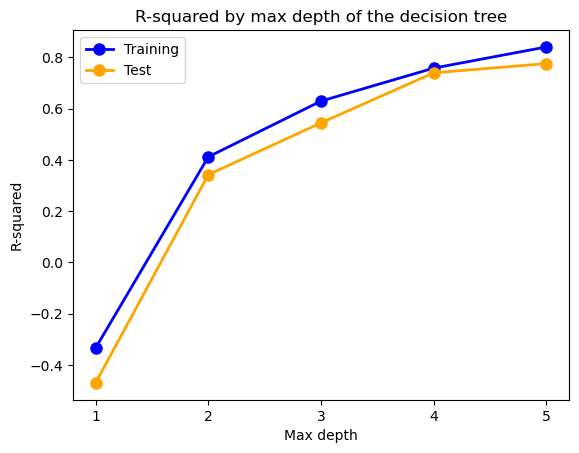

In [311]:
max_depth = [1, 2, 3, 4, 5]
r2_train = [train1_r2, train2_r2, train3_r2, train4_r2, train5_r2]
r2_test = [test1_r2, test2_r2, test3_r2, test4_r2, test5_r2]

plt.plot(max_depth, r2_train, 'go-', linewidth=2, markersize=8, color = 'blue')
plt.plot(max_depth, r2_test, 'go-', linewidth=2, markersize=8, color = 'orange')
plt.title('R-squared by max depth of the decision tree')
plt.xlabel('Max depth')
plt.ylabel('R-squared')
plt.legend(['Training', 'Test'])
plt.xticks(max_depth)
plt.show()

With max depth at 5, the model still appears to be improving its R squared score for training and test fits. It is not possible to conclude here if max_depth = 5 is optimal. It is notable that for max_depth = 1, the R squared is negative, outside the range of 0 to 1 for R squared, suggesting that R squared might not be a fully appropriate metric for decision trees.

/var/folders/3z/782f55t14ylb51cf2tclhh7r0000gn/T/ipykernel_72949/1861392228.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(complexity, adjr2_test, 'go-', linewidth=2, markersize=8, color = 'red')
/var/folders/3z/782f55t14ylb51cf2tclhh7r0000gn/T/ipykernel_72949/1861392228.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(complexity, r2_test, 'go-', linewidth=2, markersize=8, color = 'green')


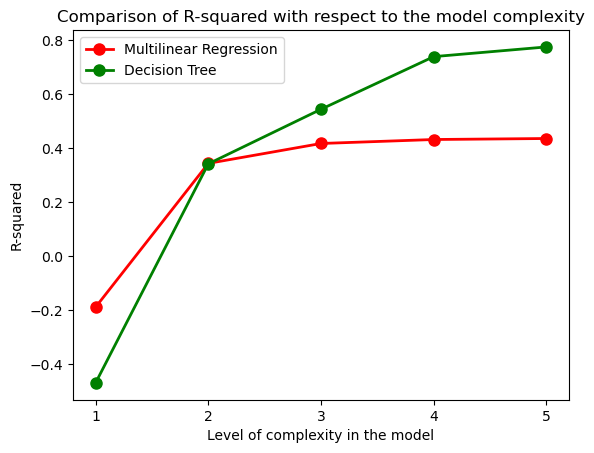

In [334]:
complexity = [1, 2, 3, 4, 5]


plt.plot(complexity, adjr2_test, 'go-', linewidth=2, markersize=8, color = 'red')
plt.plot(complexity, r2_test, 'go-', linewidth=2, markersize=8, color = 'green')
plt.title('Comparison of R-squared with respect to the model complexity')
plt.xlabel('Level of complexity in the model')
plt.ylabel('R-squared')
plt.legend(['Multilinear Regression', 'Decision Tree'])
plt.xticks(complexity)
plt.show()

Comparing the two models, multilinear regression is interesting, however the comparison has some limitations. We see that initially the linear regression model is better, but quickly the decision tree overtakes the multilinear regression and reaches much better R squared values. It is important to note that level of complexity is different for each model: the multilinear model refers to the number of features, but the decision tree is the depth. At depth 1 there is 1 feature, at depth 2 then 2 additional features are added, at depth 3 then 4 features are added...

In [313]:
# Using GridSearchCV to optimize the parameters.
dt = DecisionTreeRegressor(random_state=0)

parameters ={'max_depth': [3, 5, 7, 10], 'min_samples_leaf': [1, 2, 5, 10]}
dt = GridSearchCV(dt, parameters)

dt.fit(X_train, y_train)
print('The best hyperparameters for the decision tree regressor are', dt.best_estimator_)

The best hyperparameters for the decision tree regressor are DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, random_state=0)


In [314]:
dt_best = DecisionTreeRegressor(max_depth = 10, min_samples_leaf = 5, random_state = 0)
dt_best.fit(X_train, y_train)

train_best_r2 = r2_score(dt_best.predict(X_train), y_train)
test_best_r2 = r2_score(dt_best.predict(X_test), y_test)

print('The R-squared score for the decision tree with best fit parameters fit to the training data is', round(train_best_r2, 4), '\n')
print('The R-squared score for the decision tree with best fit parameters fit to the test data is', round(test_best_r2, 4), '\n')

The R-squared score for the decision tree with best fit parameters fit to the training data is 0.962 

The R-squared score for the decision tree with best fit parameters fit to the test data is 0.7848 



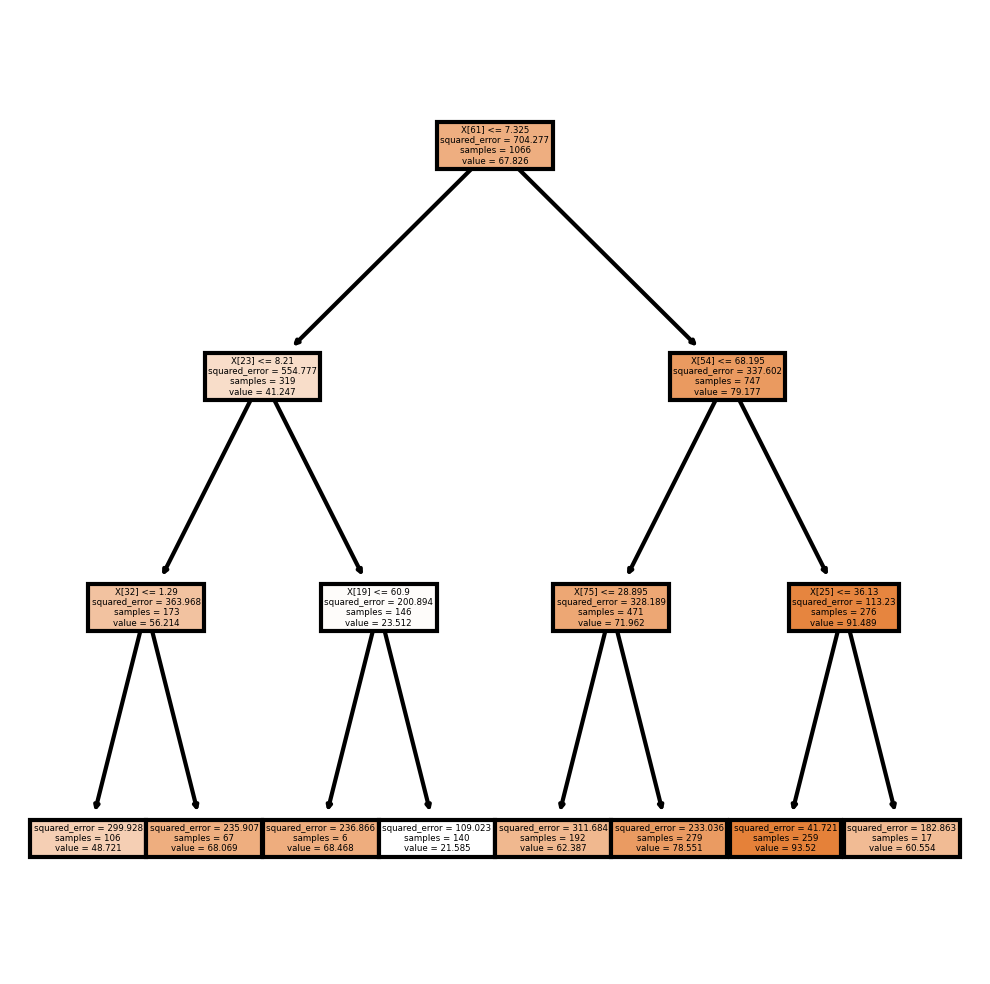

In [315]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt3, filled = True)
fig.savefig('dt3.png')

In [326]:
print('The first node is', data.columns[61], '\n')
print('The second level of nodes is', data.columns[23], 'and', data.columns[54], '\n')
print('The third level of nodes is', data.columns[32], ',', data.columns[19], ',', data.columns[75], 'and', data.columns[25])

The first node is EI_news_week_p 

The second level of nodes is DM_age_diff_mean and EI_women_tv_p 

The third level of nodes is DM_age_diff_0_p_se , DM_marr_p , RH_contr_p and DM_age_diff_10plus_p


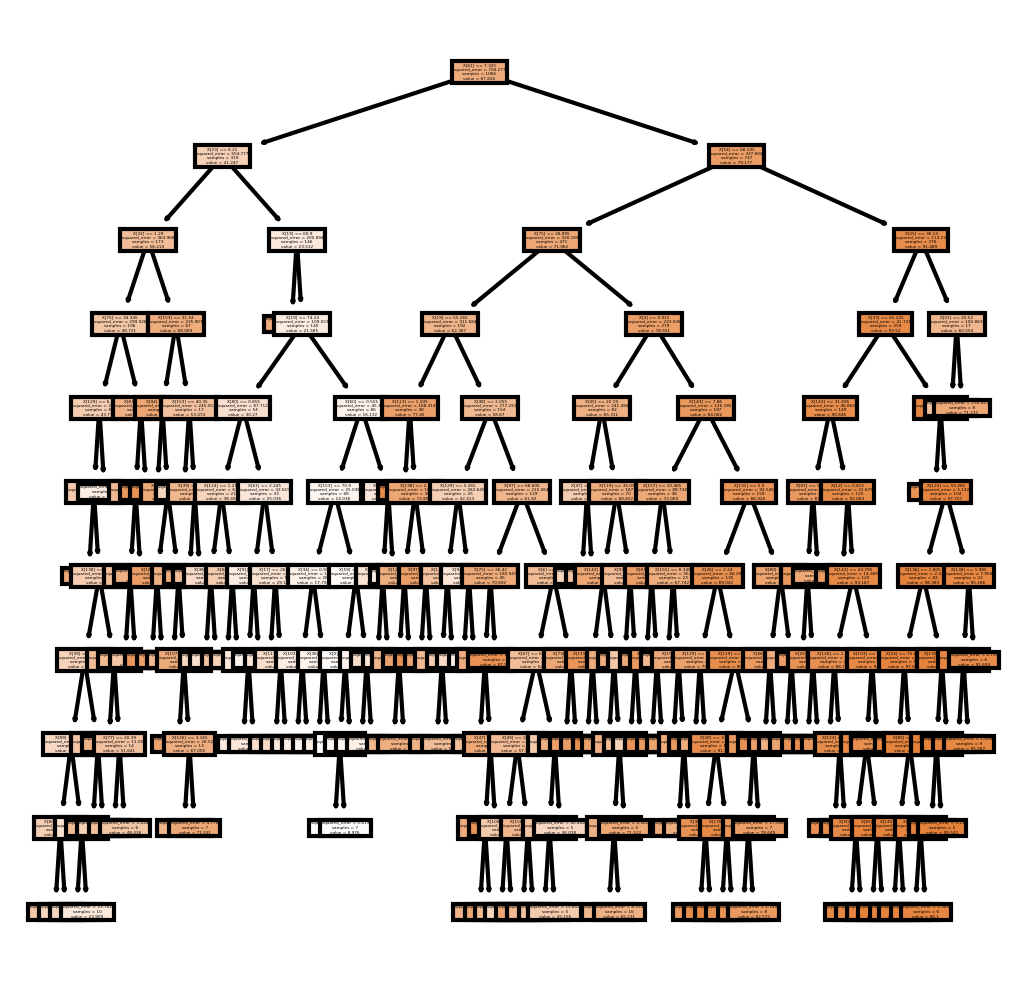

In [327]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt_best, filled = True)
fig.savefig('dt_best.png')

## Conclusions
Using the R squared method, we can conlude that the decision tree is a more efficient model for this data, with the best fit decision tree model outperforming the multilinear regression model (0.78 to 0.42). However, while the decision tree has the advantage in accuracy, and with the GridSearchCV, optimization was simple, the multilinear regression is easier to understand and interpret. On the other hand, in the forward stepwise refinement, in order to make it more manageable, we reduced the available features, while decision tree considered all.
In future modeling and analysis it would be good to explore random forest and boosting algorithms, to see if they could improve the efficiency of the regression models.